# Energy Personalized Recommender

In [1]:
#Import Packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.cluster import AgglomerativeClustering

from numpy.linalg import eig
from sklearn.decomposition import PCA

from sklearn.cluster import DBSCAN
import skfuzzy as fuzz

# Read the Data

In [2]:
#Load the Dataset
data = pd.read_csv(r"C:\Users\DD\Desktop\ML PROJECTS\Capstone\user1.csv")

In [3]:
data

timestamp  office_strip_10  fridge_11  lamp_10  fridge_10  \
0       2023-08-20 00:00:00              0.0    122.327      NaN      113.8   
1       2023-08-20 00:01:00              0.0    122.290      NaN      113.8   
2       2023-08-20 00:02:00              0.0    122.162      NaN      113.8   
3       2023-08-20 00:03:00              0.0    122.290      NaN      113.8   
4       2023-08-20 00:04:00              0.0    122.472      NaN      113.8   
...                     ...              ...        ...      ...        ...   
151195  2023-12-02 23:55:00              0.0        NaN      NaN        NaN   
151196  2023-12-02 23:56:00              0.0        NaN      NaN        NaN   
151197  2023-12-02 23:57:00              0.0        NaN      NaN        NaN   
151198  2023-12-02 23:58:00              0.0        NaN      NaN        NaN   
151199  2023-12-02 23:59:00              0.0        NaN      NaN        NaN   

        tv_10  food_processor_10  tv_11  charger_10  
0         7.8                0.0  1.240         0.0  
1         7.8                0.0  1.312         0.0  
2         7.8                0.0  1.221         0.0  
3         7.8                0.0  1.002         0.0  
4         7.8                0.0  1.167         0.0  
...       ...                ...    ...         ...  
151195    NaN                NaN  0.875         NaN  
151196    NaN                NaN  1.021         NaN  
151197    NaN                NaN  0.930         NaN  
151198    NaN                NaN  0.857         NaN  
151199    NaN                NaN  0.820         NaN  

[151200 rows x 9 columns]

# Understand and Prepare the Data

In [4]:
# check the data types for variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151200 entries, 0 to 151199
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          151200 non-null  object 
 1   office_strip_10    106033 non-null  float64
 2   fridge_11          108840 non-null  float64
 3   lamp_10            73021 non-null   float64
 4   fridge_10          120250 non-null  float64
 5   tv_10              85644 non-null   float64
 6   food_processor_10  117818 non-null  float64
 7   tv_11              111612 non-null  float64
 8   charger_10         33001 non-null   float64
dtypes: float64(8), object(1)
memory usage: 10.4+ MB


In [5]:
#give descriptive statistics of a DataFrame
data.describe

<bound method NDFrame.describe of                   timestamp  office_strip_10  fridge_11  lamp_10  fridge_10  \
0       2023-08-20 00:00:00              0.0    122.327      NaN      113.8   
1       2023-08-20 00:01:00              0.0    122.290      NaN      113.8   
2       2023-08-20 00:02:00              0.0    122.162      NaN      113.8   
3       2023-08-20 00:03:00              0.0    122.290      NaN      113.8   
4       2023-08-20 00:04:00              0.0    122.472      NaN      113.8   
...                     ...              ...        ...      ...        ...   
151195  2023-12-02 23:55:00              0.0        NaN      NaN        NaN   
151196  2023-12-02 23:56:00              0.0        NaN      NaN        NaN   
151197  2023-12-02 23:57:00              0.0        NaN      NaN        NaN   
151198  2023-12-02 23:58:00              0.0        NaN      NaN        NaN   
151199  2023-12-02 23:59:00              0.0        NaN      NaN        NaN   

        tv_10  fo

In [6]:
data.shape#show number of rows and columns

(151200, 9)

In [7]:
data.isnull().sum()#count the number of missing values

timestamp                 0
office_strip_10       45167
fridge_11             42360
lamp_10               78179
fridge_10             30950
tv_10                 65556
food_processor_10     33382
tv_11                 39588
charger_10           118199
dtype: int64

# Missing Data Treatment

<Axes: >

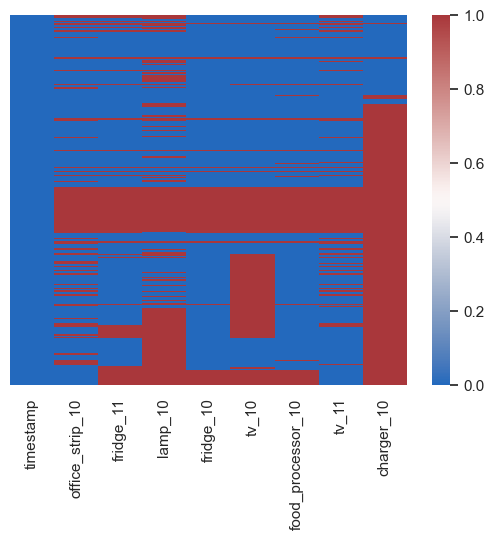

In [8]:
sns.heatmap(data.isnull(), yticklabels=False, cmap="vlag")

In [9]:
#Fill missing values using Fillna method 
data['fridge_11'].fillna(data['fridge_11'].median(),inplace=True)
data['lamp_10'].fillna(data['lamp_10'].median(),inplace=True)
data['fridge_10'].fillna(data['fridge_10'].median(),inplace=True)
data['tv_10'].fillna(data['tv_10'].median(),inplace=True)
data['tv_11'].fillna(data['tv_11'].median(),inplace=True)
data['charger_10'].fillna(data['charger_10'].median(),inplace=True)
data['office_strip_10'].fillna(data['office_strip_10'].median(),inplace=True)
data['food_processor_10'].fillna(data['food_processor_10'].median(),inplace=True)

In [10]:
data.isnull().sum()#no missing values

timestamp            0
office_strip_10      0
fridge_11            0
lamp_10              0
fridge_10            0
tv_10                0
food_processor_10    0
tv_11                0
charger_10           0
dtype: int64

<Axes: >

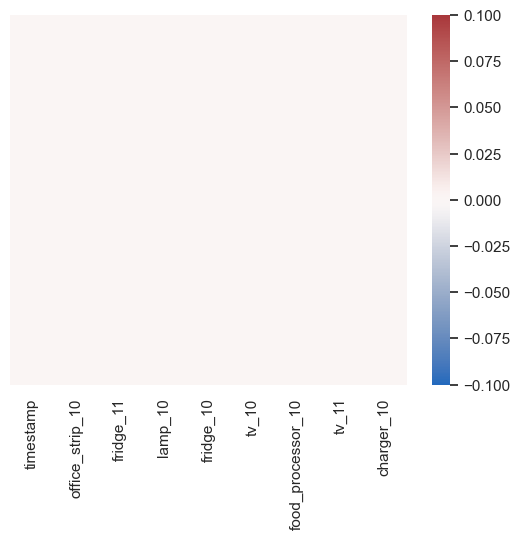

In [11]:
#Visualizing the null values
sns.heatmap(data.isnull(), yticklabels=False, cmap="vlag")

In [9]:
num_data=data.select_dtypes(exclude="object")
num_data

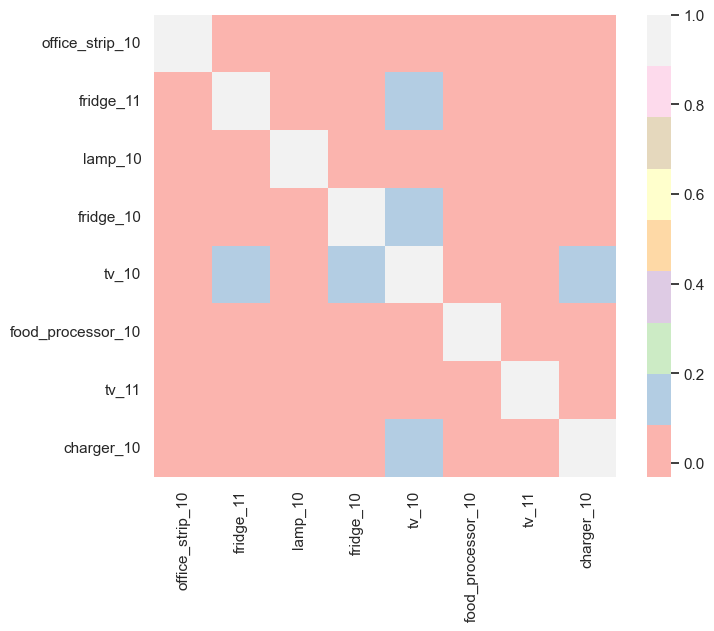

In [10]:
#Examaning a correlation matrix of all the features
corrmat=num_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corrmat,cmap="Pastel1",square=True)
plt.show()

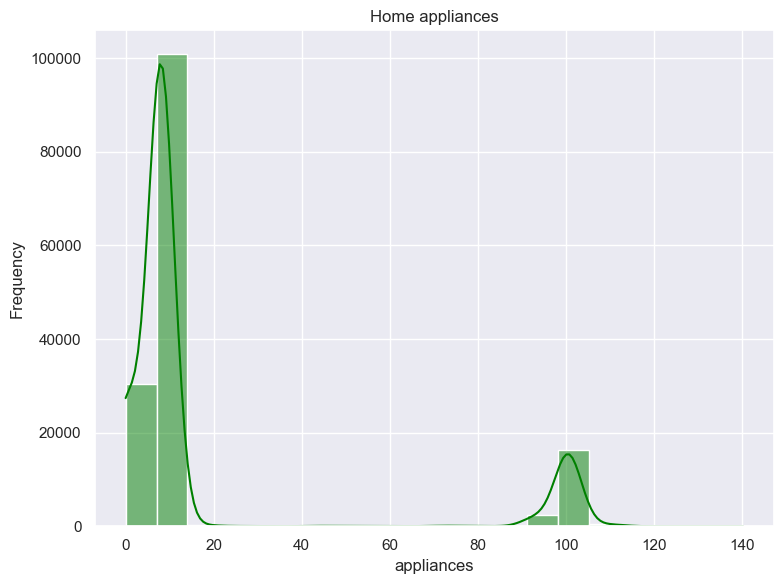

In [9]:
plt.figure(figsize=(8, 6))# Histplot for the TV-10 appliances
sns.histplot(data['tv_10'], bins=20, color='green', kde=True)
plt.xlabel('appliances')
plt.ylabel('Frequency')
plt.title('Home appliances')
plt.tight_layout()
plt.show()

<Axes: xlabel='office_strip_10', ylabel='Count'>

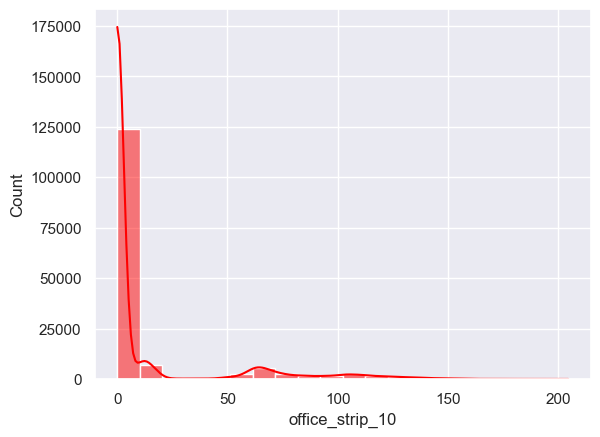

In [37]:
#Histogram of office_strip_10'
sns.histplot(data['office_strip_10'], bins=20,color='red', kde=True)

<Axes: xlabel='fridge_11', ylabel='Count'>

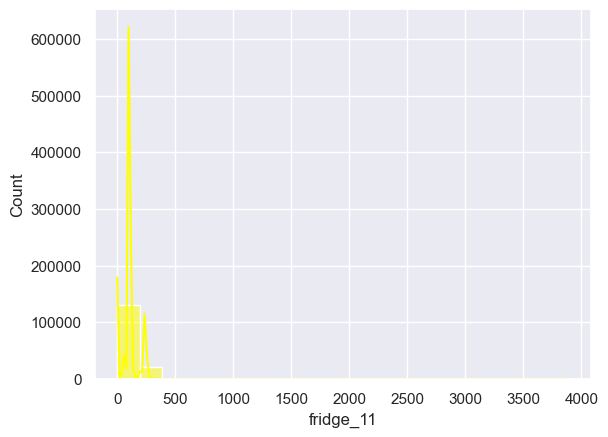

In [36]:
#Histogram of fridge_11
sns.histplot(data['fridge_11'], bins=20,color='yellow', kde=True)

<Axes: xlabel='lamp_10', ylabel='Count'>

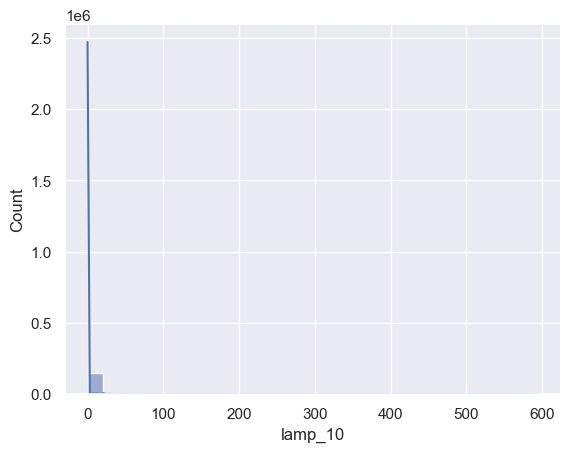

In [12]:
#Histogram of 'lamp_10'
sns.histplot(data['lamp_10'], bins=30,color='blue', kde=True)

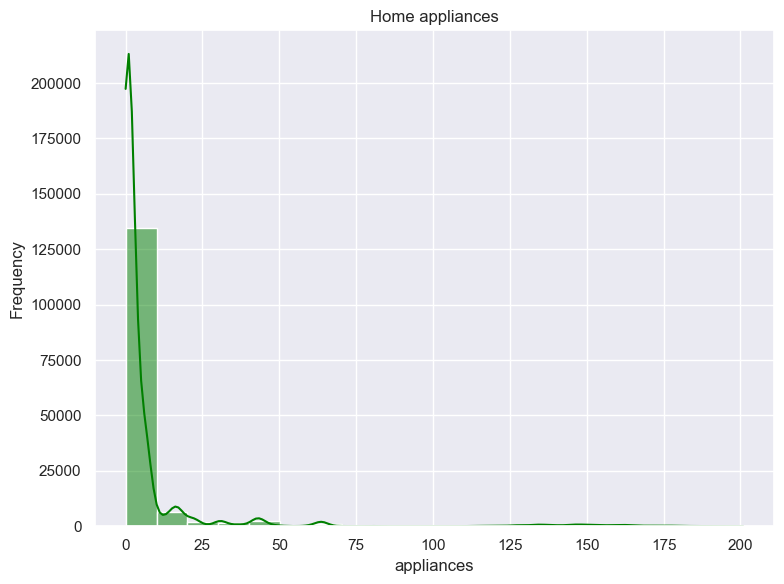

In [13]:
plt.figure(figsize=(8, 6))# Histplot for the TV-11
sns.histplot(data['tv_11'], bins=20, color='green', kde=True)
plt.xlabel('appliances')
plt.ylabel('Frequency')
plt.title('Home appliances')
plt.tight_layout()
plt.show()

<Axes: xlabel='lamp_10'>

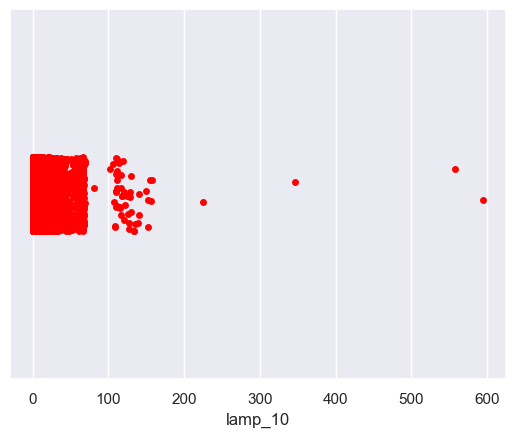

In [20]:
#strip plot for the lamp 10 
sns.stripplot(x='lamp_10', color='red',data=data)

<Axes: xlabel='tv_10'>

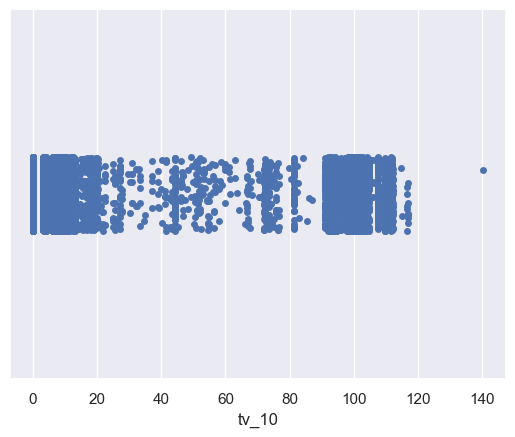

In [15]:
#strip plot for the tv-10
sns.stripplot(x='tv_10',color='green', data=data)

C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


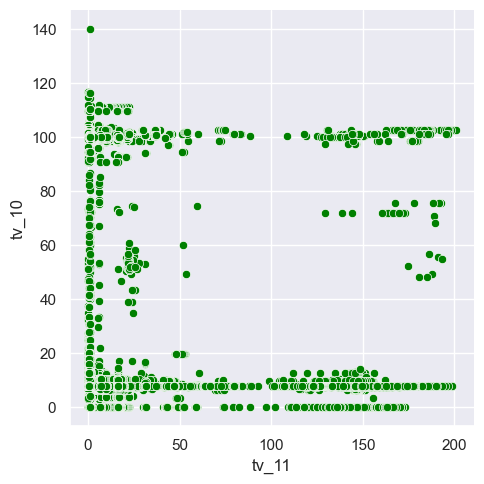

In [34]:
# relplot provides a high-level interface for tv11 and tv-10 
sns.relplot(x='tv_11', y='tv_10',color='green',data=data)


C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


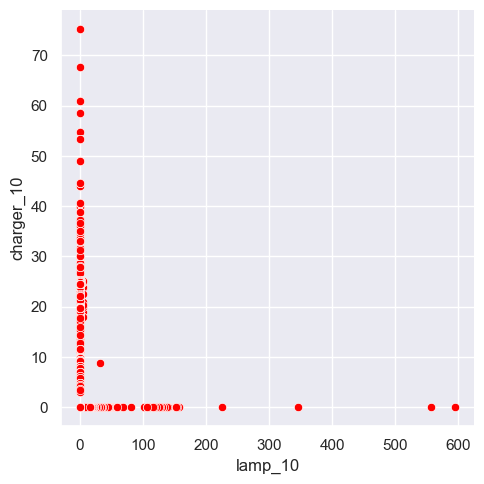

In [32]:
## relplot provides a high-level interface for lamp_10 and charger_10 
sns.relplot(x='lamp_10', y='charger_10', color='red',data=data)

<Axes: xlabel='office_strip_10', ylabel='Density'>

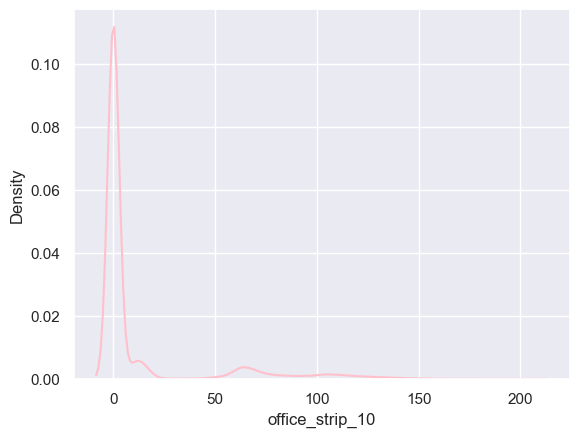

In [21]:
#KDE plot for the office strip 10
sns.kdeplot(x='office_strip_10',color='pink', data=data)

<Axes: xlabel='fridge_11', ylabel='Density'>

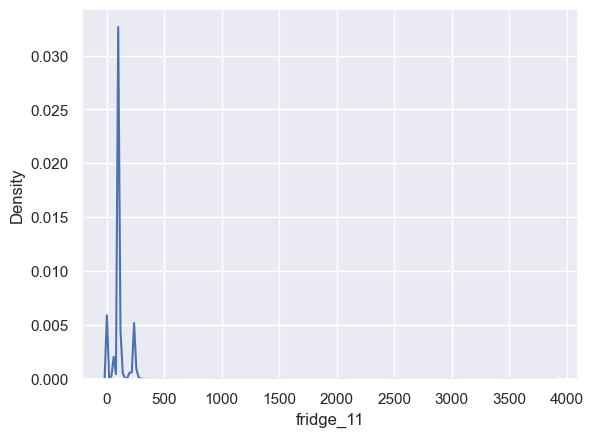

In [20]:
#KDE plot for the fridge 11
sns.kdeplot(x='fridge_11', data=data)

<Axes: xlabel='food_processor_10', ylabel='Proportion'>

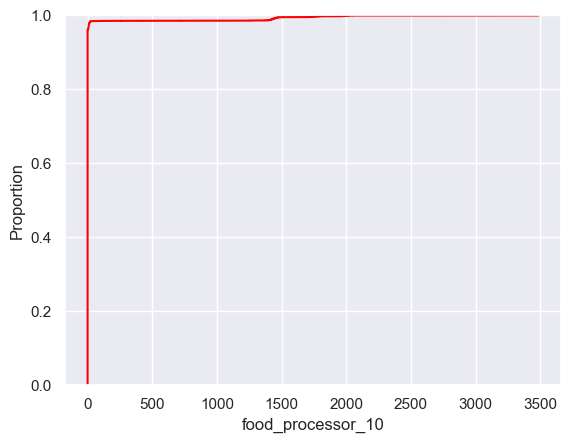

In [31]:
#ecdf plot for the food_processor_10
sns.ecdfplot(x='food_processor_10',color='red', data=data)

<Axes: xlabel='charger_10', ylabel='Proportion'>

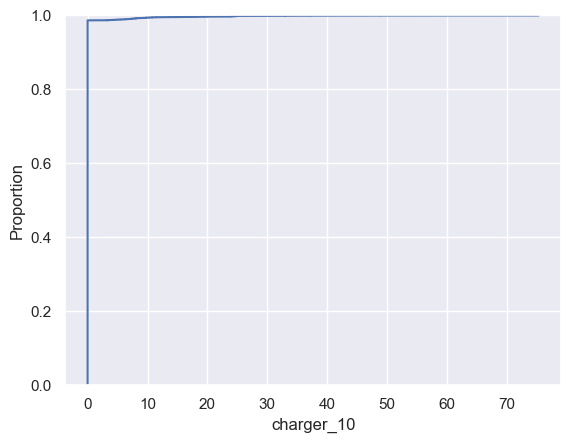

In [23]:
#ecdf plot for the charger_10
sns.ecdfplot(x='charger_10', data=data)

<Axes: xlabel='tv_10', ylabel='Proportion'>

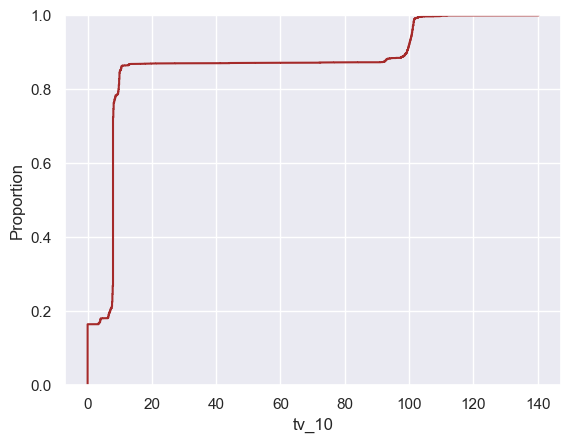

In [41]:
#ecdf plot for the tv=10
sns.ecdfplot(x='tv_10',color='brown', data=data)

<Axes: xlabel='tv_11', ylabel='Proportion'>

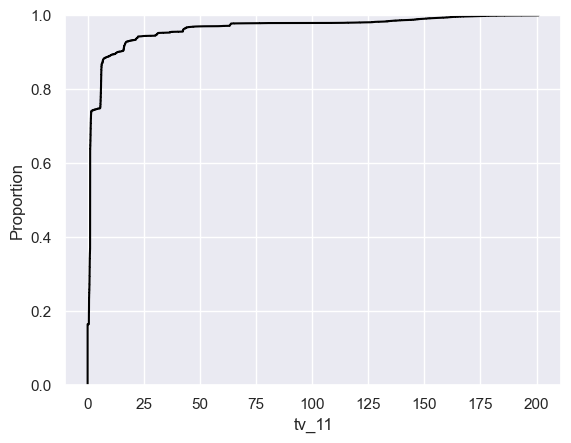

In [30]:
#ecdf plot for the tv=11
sns.ecdfplot(x='tv_11', color='black',data=data)

<Axes: xlabel='lamp_10', ylabel='Proportion'>

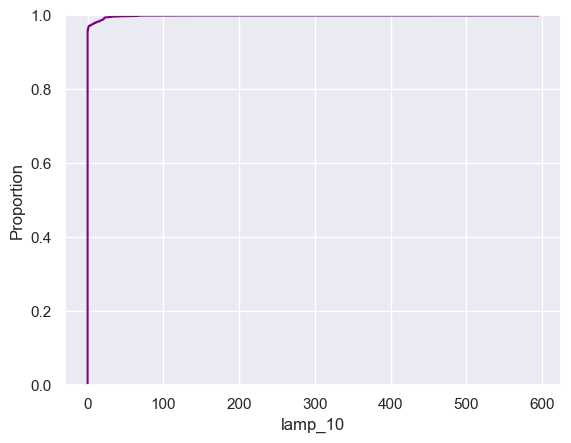

In [29]:
#ecdf plot for the lamp 10
sns.ecdfplot(x='lamp_10', color='purple',data=data)

<Axes: xlabel='tv_10', ylabel='tv_11'>

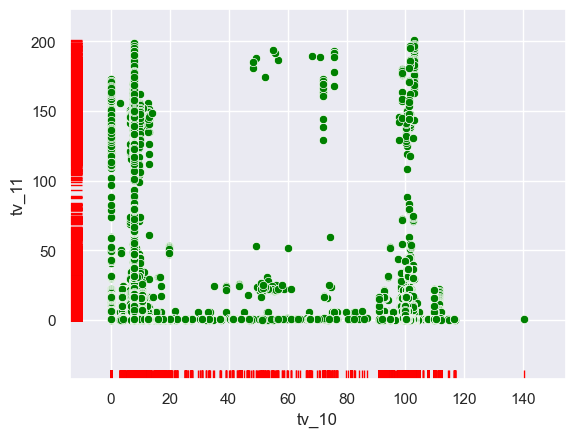

In [26]:
#scatter plot and rugplot for the tv10 and tv11
sns.scatterplot(x='tv_10', y='tv_11', color='green',data=data)
sns.rugplot(x='tv_10', y='tv_11', color='red',data=data)

<Axes: xlabel='lamp_10', ylabel='charger_10'>

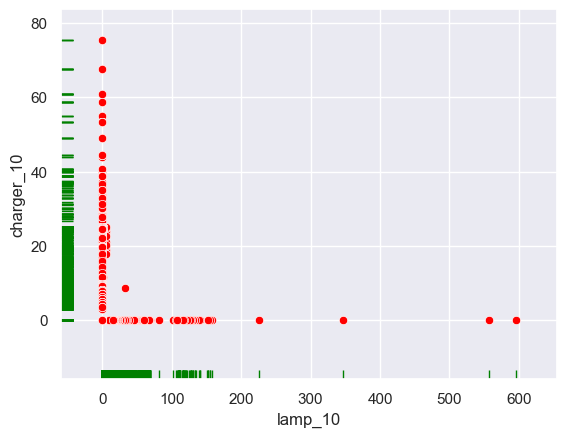

In [27]:
#scatter plot and rugplot for the lamp_10 and charger_10
sns.scatterplot(x='lamp_10', y='charger_10', color='red',data=data)
sns.rugplot(x='lamp_10', y='charger_10',color='green', data=data)

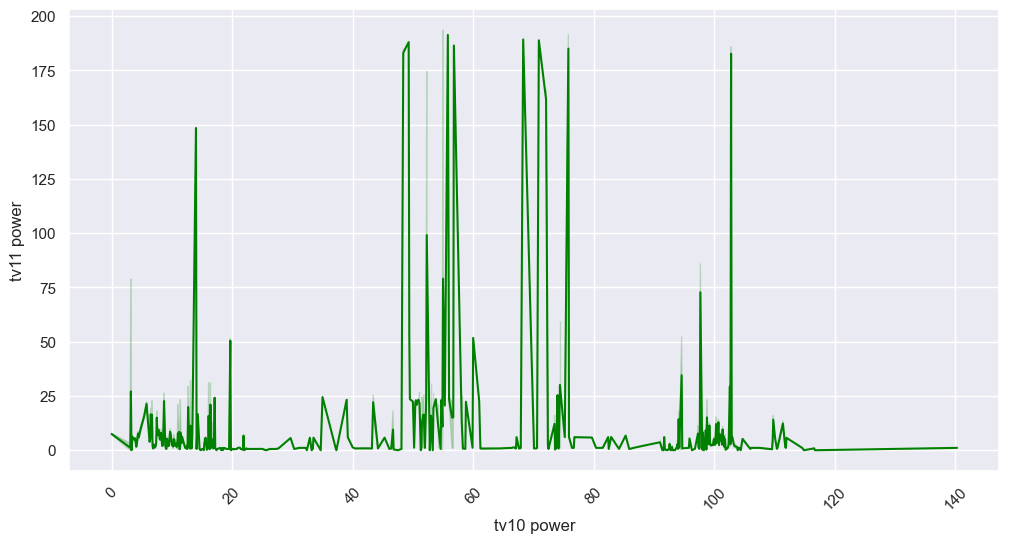

In [38]:
#line plot for the tv_10 and tv_11
plt.figure(figsize=(12, 6))
sns.lineplot(x='tv_10', y='tv_11', color='green',data=data)
plt.xlabel('tv10 power')
plt.ylabel('tv11 power')
plt.xticks(rotation=45)
plt.show()

# Visualization

C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


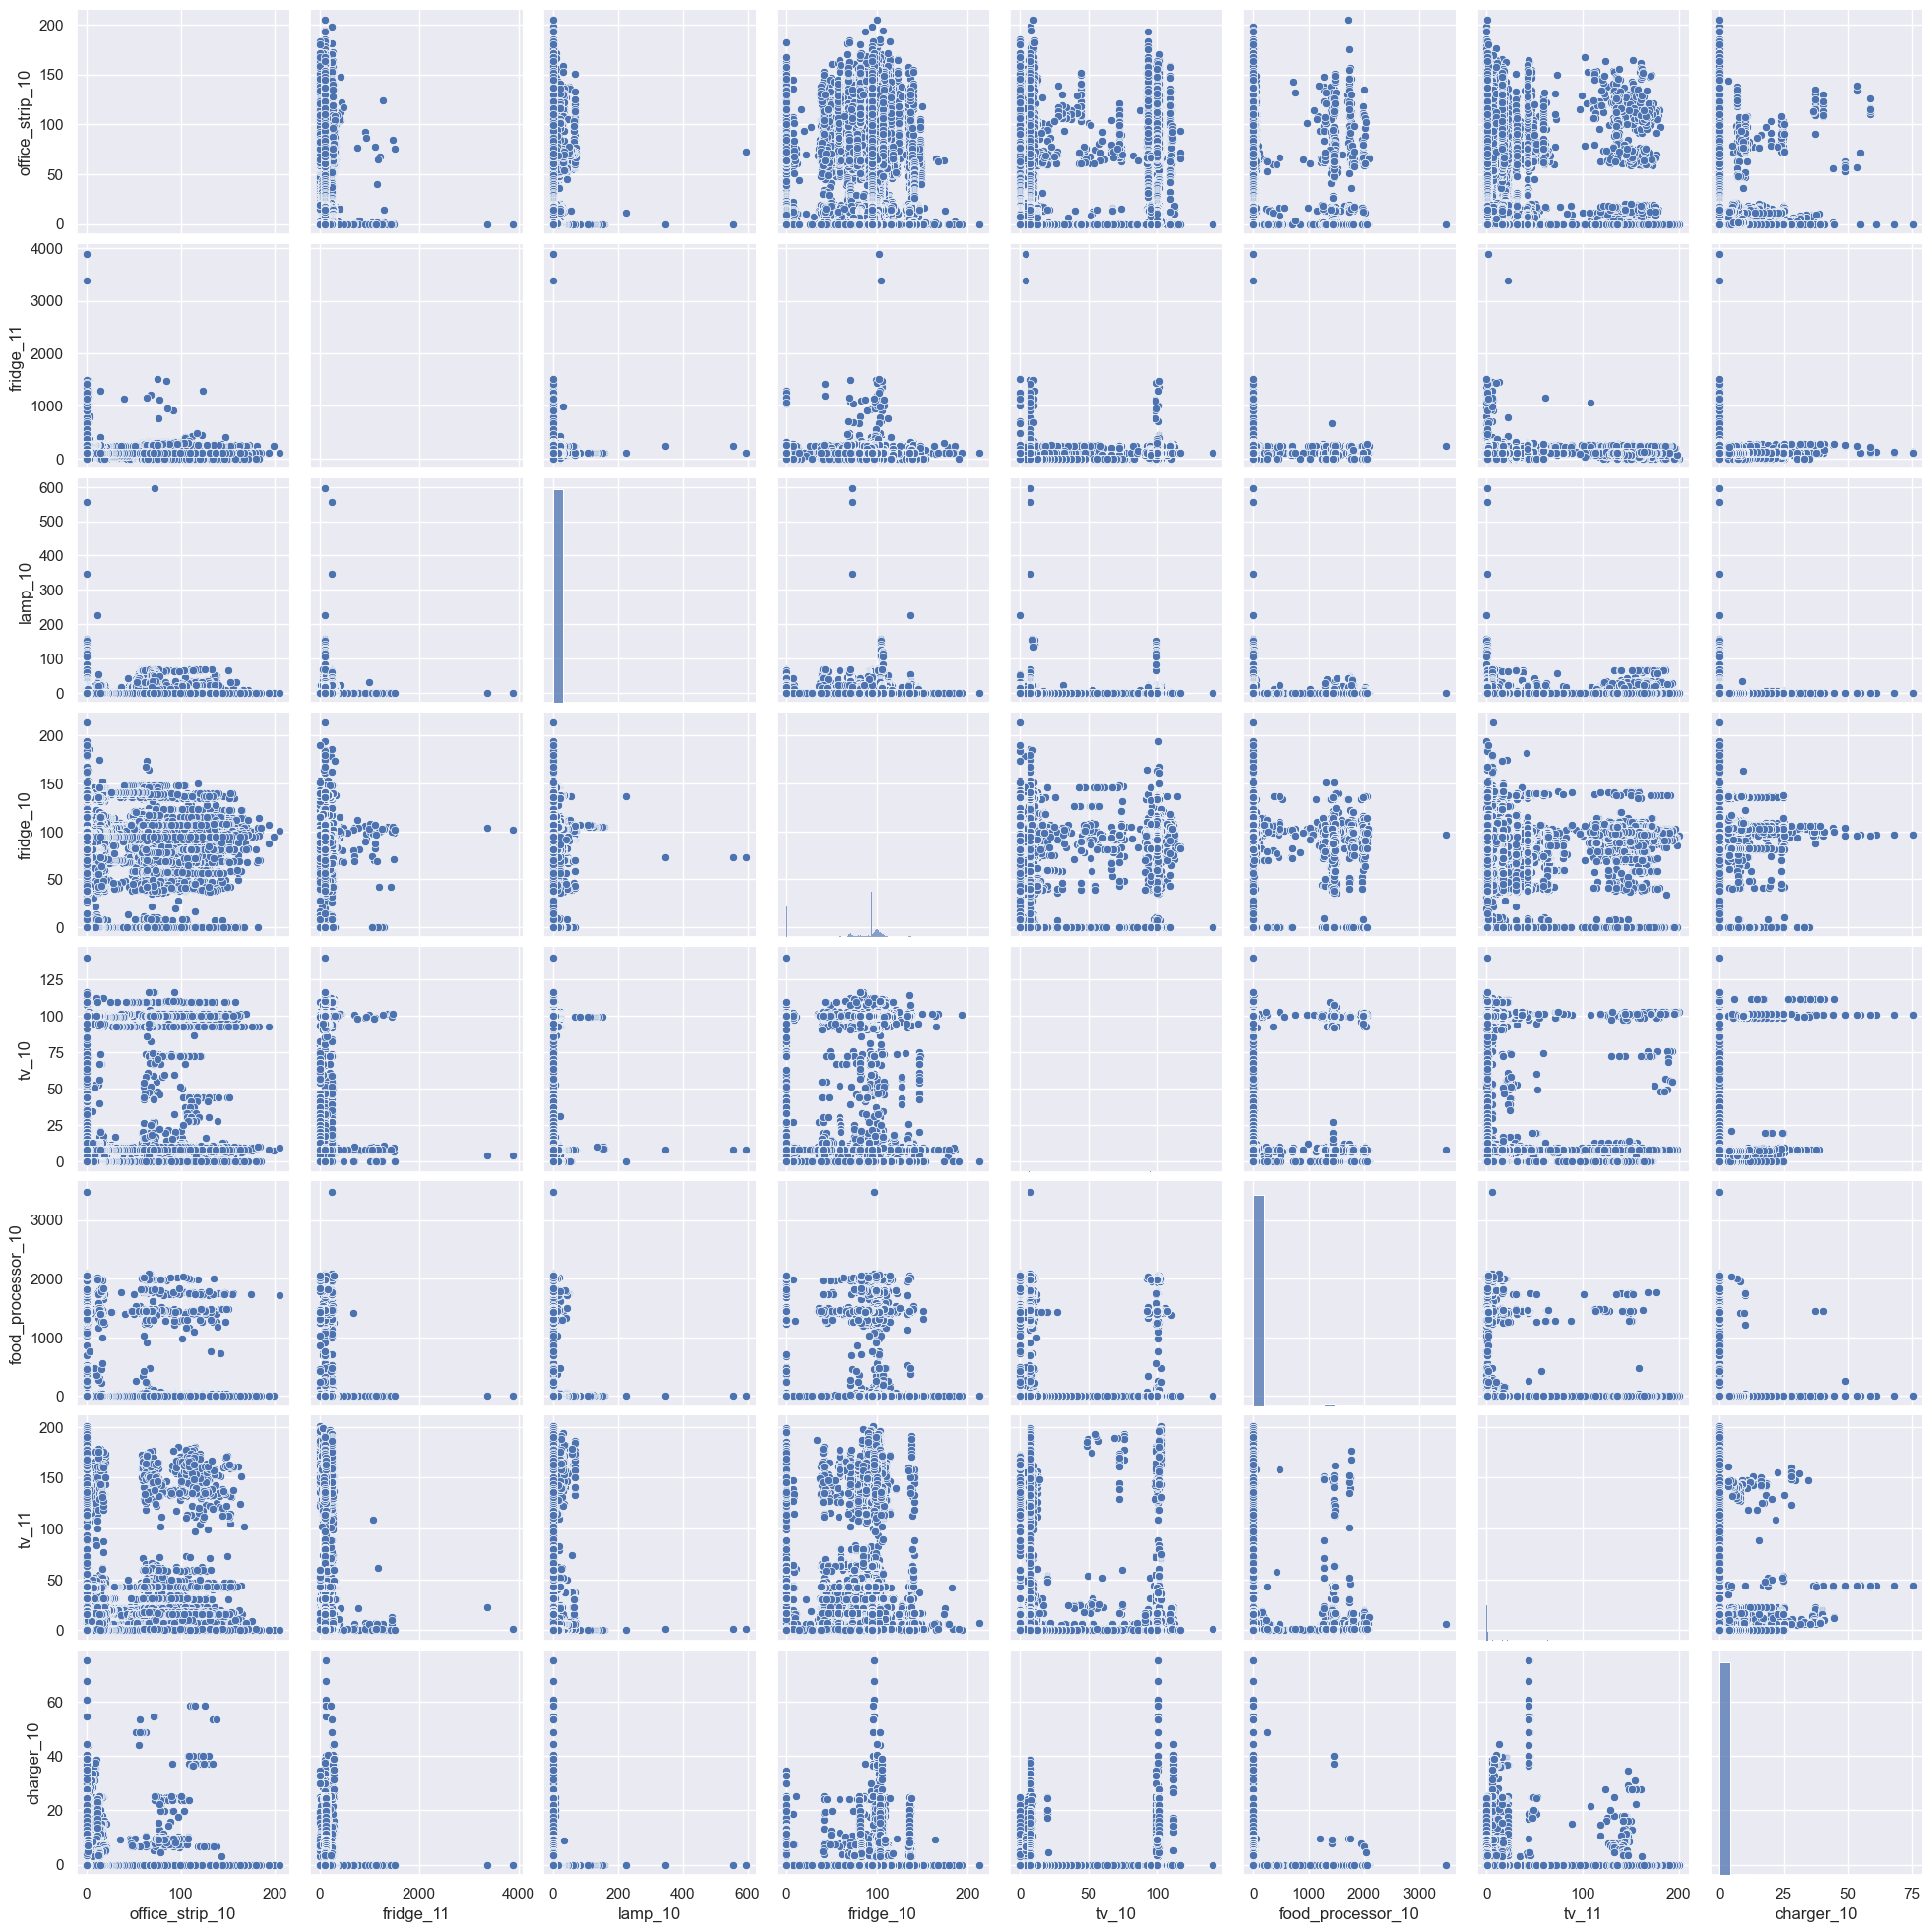

In [27]:
#pair plot for the data 
sns.pairplot(data)

In [11]:
df=data.drop(['timestamp'],axis=1)
data1=df.sample(500)

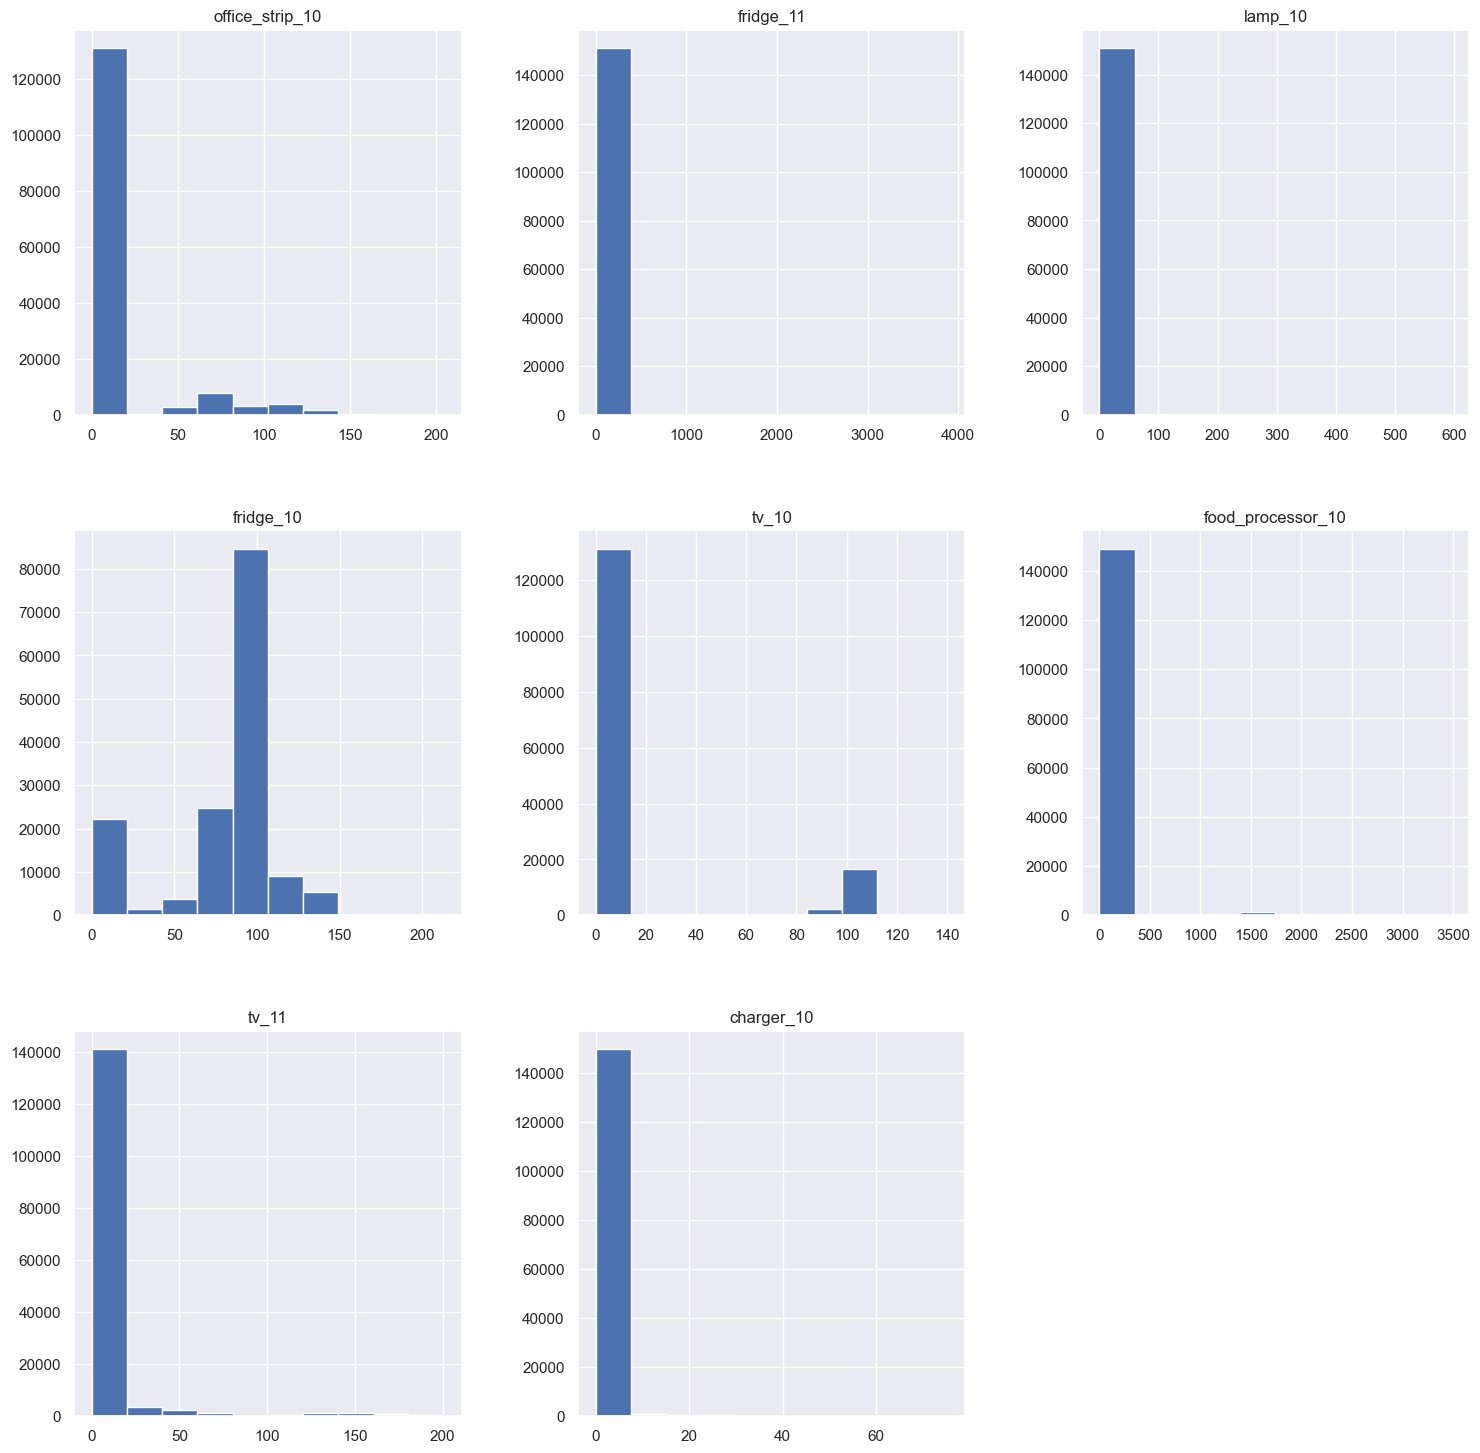

In [29]:
#his plot for the data 
fig = data.hist(figsize = (18,18))

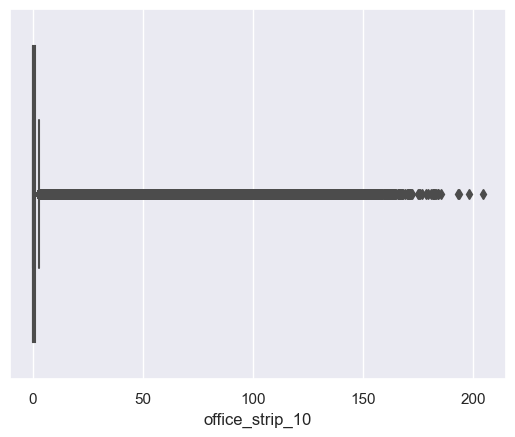

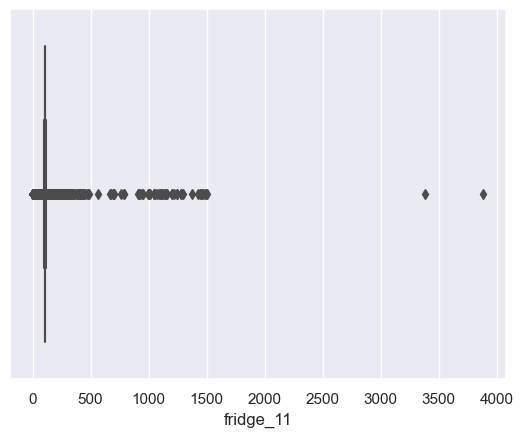

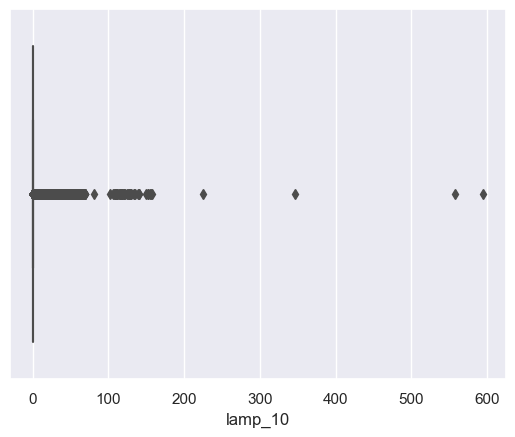

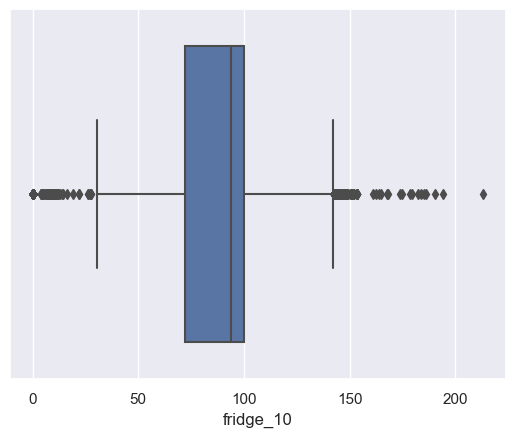

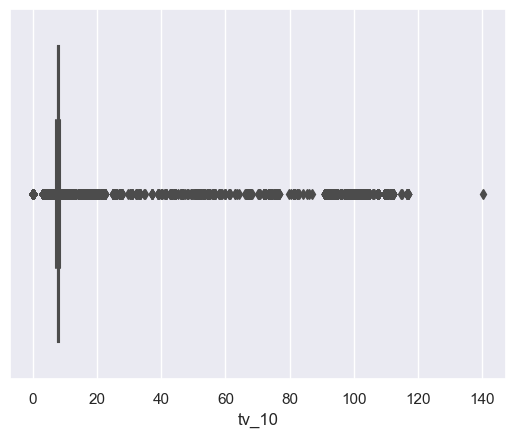

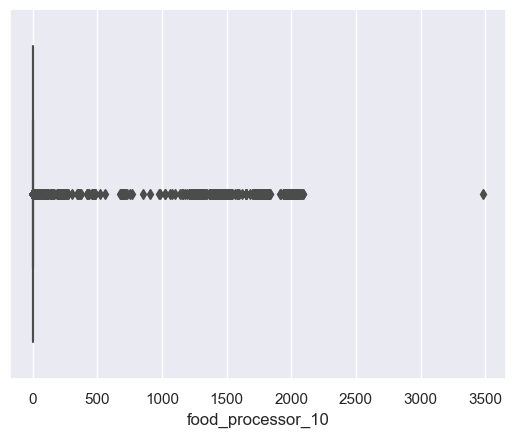

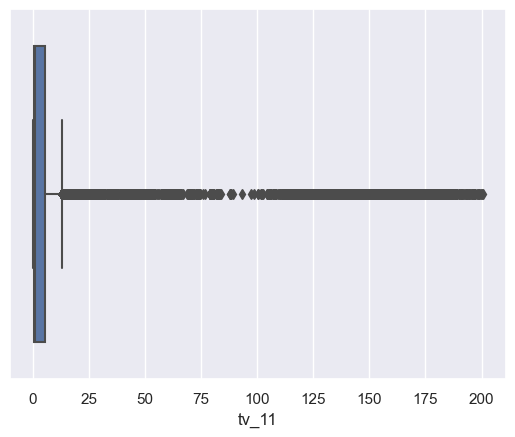

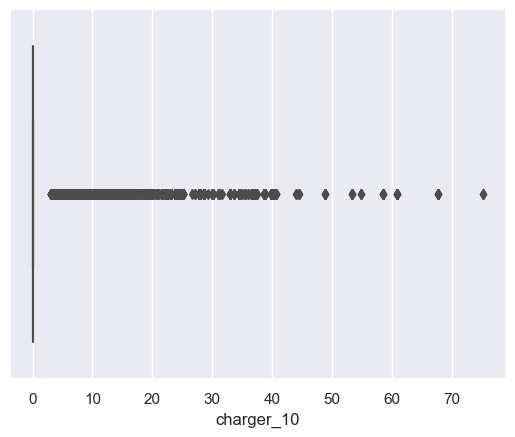

In [8]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

for i in numeric_columns:
    sns.boxplot(x=data[i])
    plt.show()

In [56]:
def detect_outliers_iqr(data,threshold=1.5):
    Q1=np.percentile(data,25)
    Q3=np.percentile(data,75)
    iQR=Q3-Q1
    lower_bound=Q1-threshold*IQR
    upperbound=Q3+threshold*IQR
    return np.where((data< lower_bound)|(data>upper_bound))

In [57]:
data

timestamp  office_strip_10  fridge_11  lamp_10  fridge_10  \
0       2023-08-20 00:00:00              0.0    122.327      0.0      113.8   
1       2023-08-20 00:01:00              0.0    122.290      0.0      113.8   
2       2023-08-20 00:02:00              0.0    122.162      0.0      113.8   
3       2023-08-20 00:03:00              0.0    122.290      0.0      113.8   
4       2023-08-20 00:04:00              0.0    122.472      0.0      113.8   
...                     ...              ...        ...      ...        ...   
151195  2023-12-02 23:55:00              0.0    105.002      0.0       94.1   
151196  2023-12-02 23:56:00              0.0    105.002      0.0       94.1   
151197  2023-12-02 23:57:00              0.0    105.002      0.0       94.1   
151198  2023-12-02 23:58:00              0.0    105.002      0.0       94.1   
151199  2023-12-02 23:59:00              0.0    105.002      0.0       94.1   

        tv_10  food_processor_10  tv_11  charger_10  
0         7.8                0.0  1.240         0.0  
1         7.8                0.0  1.312         0.0  
2         7.8                0.0  1.221         0.0  
3         7.8                0.0  1.002         0.0  
4         7.8                0.0  1.167         0.0  
...       ...                ...    ...         ...  
151195    7.9                0.0  0.875         0.0  
151196    7.9                0.0  1.021         0.0  
151197    7.9                0.0  0.930         0.0  
151198    7.9                0.0  0.857         0.0  
151199    7.9                0.0  0.820         0.0  

[151200 rows x 9 columns]

In [58]:
df=data.drop(['timestamp'],axis=1)

In [59]:
df

office_strip_10  fridge_11  lamp_10  fridge_10  tv_10  \
0                   0.0    122.327      0.0      113.8    7.8   
1                   0.0    122.290      0.0      113.8    7.8   
2                   0.0    122.162      0.0      113.8    7.8   
3                   0.0    122.290      0.0      113.8    7.8   
4                   0.0    122.472      0.0      113.8    7.8   
...                 ...        ...      ...        ...    ...   
151195              0.0    105.002      0.0       94.1    7.9   
151196              0.0    105.002      0.0       94.1    7.9   
151197              0.0    105.002      0.0       94.1    7.9   
151198              0.0    105.002      0.0       94.1    7.9   
151199              0.0    105.002      0.0       94.1    7.9   

        food_processor_10  tv_11  charger_10  
0                     0.0  1.240         0.0  
1                     0.0  1.312         0.0  
2                     0.0  1.221         0.0  
3                     0.0  1.002         0.0  
4                     0.0  1.167         0.0  
...                   ...    ...         ...  
151195                0.0  0.875         0.0  
151196                0.0  1.021         0.0  
151197                0.0  0.930         0.0  
151198                0.0  0.857         0.0  
151199                0.0  0.820         0.0  

[151200 rows x 8 columns]

In [60]:
data1=df.sample(5000)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
#instantiate and fit 'StandardScaler' function
power_scaler = scaler.fit_transform(data1)

In [16]:
#Create a dataframe of the scaled features
power_scaler = pd.DataFrame(power_scaler)
power_scaler.columns = [data1]

#head() to display top five rows
power_scaler.head()

office_strip_10 fridge_11   lamp_10 fridge_10     tv_10 food_processor_10  \
0       -0.394052 -0.146200 -0.124403 -0.245297 -0.340394         -0.121187   
1       -0.394052  1.717588 -0.124403  0.448702 -0.470805         -0.121187   
2       -0.394052 -0.120672 -0.124403  0.384339 -0.340394         -0.121187   
3       -0.394052 -0.123855 -0.124403  0.482282  2.585897         -0.121187   
4       -0.394052 -0.154332 -0.124403  0.501871 -0.340394         -0.121187   

      tv_11 charger_10  
0 -0.269396  -0.086297  
1 -0.056174  -0.086297  
2 -0.264032  -0.086297  
3  0.406184  -0.086297  
4 -0.264032  -0.086297

# K-means Clustering

In [17]:
#Importing libraries required for KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Build a Model with Multiple K

**We do not know how many clusters give the most useful results. So, we create the clusters varying K, from 8 to 30 and then decide the optimum number of clusters (K) with the help of the silhouette score**

In [20]:
#create a list for different values of k
n_clusters = [8,12,16,20,24,30]

#use 'for' loop to build the clusters
#'random_state' returns the same sample each time you run the code
#fit and predict on the scaled data
#'silhouette_score' function computes the silhouette score for each k
for K in n_clusters :
    cluster = KMeans(n_clusters=K, random_state=10)
    predict = cluster.fit_predict(power_scaler)
    
    score = silhouette_score(power_scaler, predict, random_state=10)
    print("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 8, silhouette score is 0.5058337575670182)
For n_clusters = 12, silhouette score is 0.549909794378202)
For n_clusters = 16, silhouette score is 0.5581747038997686)
For n_clusters = 20, silhouette score is 0.5209515629210766)
For n_clusters = 24, silhouette score is 0.5961155517257004)
For n_clusters = 30, silhouette score is 0.5342387946143627)


In [22]:
wcss = []                       #Create an empty list to store the WCSS values
K = range(1,25)                 #Set a range of values for the number of clusters (K)

# Loop through each value of K
for k in K:
    kmeanModel = KMeans(n_clusters=k)           # Create a KMeans model with the current value of K
    kmeanModel.fit(power_scaler)              # Fit the model to the power_scaler
    wcss.append(kmeanModel.inertia_)

In [23]:
#Within-Cluster Sum of Squares
wcss

[39999.999999999956,
 34889.79032718383,
 30103.44436917029,
 26014.653478879118,
 22476.11768068174,
 19113.995689160605,
 16431.076648247024,
 13130.235860577666,
 11175.90408522615,
 10191.585294051198,
 9510.426576289938,
 8893.947850391069,
 8481.990384761226,
 7874.563129931721,
 7687.090885610058,
 7188.416937352149,
 6609.510717357569,
 6314.727256379746,
 5860.789450679593,
 5667.141758744081,
 5513.836314555702,
 5257.218259534466,
 4972.4401700004555,
 4899.4548052338105]

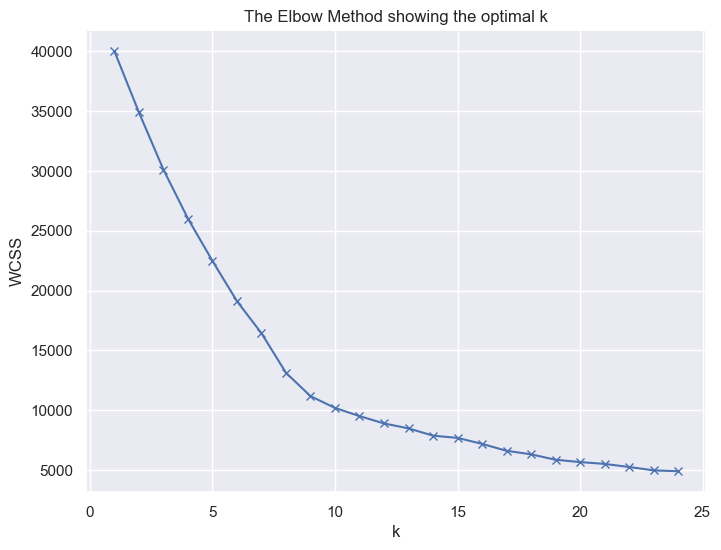

In [26]:
#"Elbow Method" to determine the optimal number of clusters (K) for K-means clustering
plt.figure(figsize=(8,6))            # Set the size of the plot

# Plotting the WCSS values against the number of clusters (K)
plt.plot(K, wcss, 'bx-')                # 'bx-' specifies blue color, marker type 'x', and line style '-'
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The optimum value for K is associated with the high value of the 'silhouette score'. From the above output it can be seen that, for K = 24, the silhouette score is highest. Thus, we build the clusters with K = 24

In [27]:
#building a K-Means model for k=24
model = KMeans(n_clusters=24, random_state=80)

#fit the model
model.fit(power_scaler)

KMeans(n_clusters=24, random_state=80)

#  Retrieve the Clusters



In [28]:
data_output = data1.copy(deep = True)
#add a column 'cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

#head to display top 5 rows
data_output.head()

office_strip_10  fridge_11  lamp_10  fridge_10  tv_10  \
105366              0.0    103.398      0.0       71.6    7.9   
10626               0.0    220.509      0.0       96.4    3.8   
77678               0.0    105.002      0.0       94.1    7.9   
69906               0.0    104.802      0.0       97.6   99.9   
108259              0.0    102.887      0.0       98.3    7.9   

        food_processor_10   tv_11  charger_10  Cluster  
105366                0.0   0.966         0.0        0  
10626                 0.0   6.054         0.0        9  
77678                 0.0   1.094         0.0       14  
69906                 0.0  17.087         0.0        4  
108259                0.0   1.094         0.0       14

We have added a column 'cluster' in the dataframe describing the cluster number for each observation

In [29]:
#Shape of data_output
data_output.shape

(5000, 9)

<Axes: xlabel='Cluster', ylabel='count'>

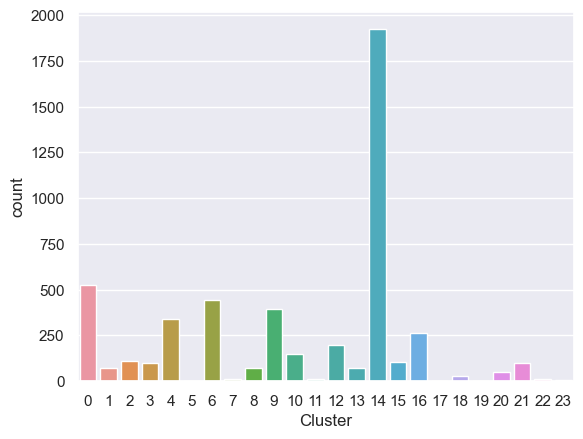

In [30]:
sns.countplot(x='Cluster',data=data_output)

In [215]:
silhouette_avg = silhouette_score(power_scaler, predict)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5342387946143627


In [216]:
calinski_harabasz_index = calinski_harabasz_score(power_scaler, predict)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Calinski-Harabasz Index: 1545.093872470954


In [217]:
davies_bouldin_index = davies_bouldin_score(power_scaler, predict)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Davies-Bouldin Index: 0.7946217125898226


In [31]:
#Create a KMeans model with 24 clusters, a maximum of 50 iterations, and a random state of 70
model_clus = KMeans(n_clusters = 24, max_iter=50,random_state = 70)
model_clus.fit(power_scaler)

KMeans(max_iter=50, n_clusters=24, random_state=70)

In [32]:
#creates a new DataFrame (data_new) and assigns the values of the power_scaler DataFrame to it
data_new = power_scaler
data_new.index = pd.RangeIndex(len(data_new.index))#reset the index of the DataFrame data_new to a default index


#concatenate the DataFrame data_km1 with a new Series containing the cluster labels assigned by the KMeans model.
power_detail= pd.concat([data_new, pd.Series(model_clus.labels_)], axis=1)


#assigns new column names to the DataFrame countries_detail_km
power_detail.columns = ['office_strip_10','fridge_11','lamp_10','fridge_10','tv_10','food_processor_10','tv_11','charger_10','ClusterID']
power_detail.head() 

office_strip_10  fridge_11   lamp_10  fridge_10     tv_10  \
0        -0.394052  -0.146200 -0.124403  -0.245297 -0.340394   
1        -0.394052   1.717588 -0.124403   0.448702 -0.470805   
2        -0.394052  -0.120672 -0.124403   0.384339 -0.340394   
3        -0.394052  -0.123855 -0.124403   0.482282  2.585897   
4        -0.394052  -0.154332 -0.124403   0.501871 -0.340394   

   food_processor_10     tv_11  charger_10  ClusterID  
0          -0.121187 -0.269396   -0.086297         23  
1          -0.121187 -0.056174   -0.086297          4  
2          -0.121187 -0.264032   -0.086297          1  
3          -0.121187  0.406184   -0.086297         22  
4          -0.121187 -0.264032   -0.086297          1

In [33]:
#number of occurrences of each unique value in the 'ClusterID' 
power_detail['ClusterID'].value_counts()

ClusterID
1     1905
23     507
2      439
4      393
22     341
9      244
14     196
8      148
12     106
13     105
19     100
0       98
7       76
15      73
3       72
21      69
10      51
20      37
18      12
16      11
6       10
11       3
5        3
17       1
Name: count, dtype: int64

In [35]:
data_cluster = pd.concat([data.reset_index(),power_detail['ClusterID']],axis=1)
data_cluster.head()

index            timestamp  office_strip_10  fridge_11  lamp_10  fridge_10  \
0      0  2023-08-20 00:00:00              0.0    122.327      0.0      113.8   
1      1  2023-08-20 00:01:00              0.0    122.290      0.0      113.8   
2      2  2023-08-20 00:02:00              0.0    122.162      0.0      113.8   
3      3  2023-08-20 00:03:00              0.0    122.290      0.0      113.8   
4      4  2023-08-20 00:04:00              0.0    122.472      0.0      113.8   

   tv_10  food_processor_10  tv_11  charger_10  ClusterID  
0    7.8                0.0  1.240         0.0       23.0  
1    7.8                0.0  1.312         0.0        4.0  
2    7.8                0.0  1.221         0.0        1.0  
3    7.8                0.0  1.002         0.0       22.0  
4    7.8                0.0  1.167         0.0        1.0

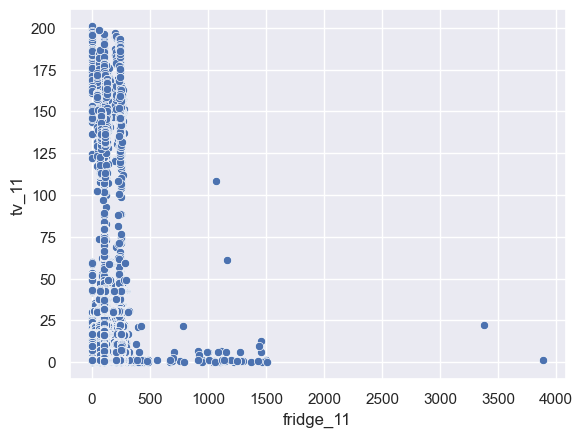

In [37]:
#Scatter plot of child_mort in x-axis and income in y-axis with different colors indicating the cluster assignments
sns.scatterplot(x='fridge_11',y='tv_11',data=data_cluster)
plt.show()

# Cluster Analysis

In [38]:
#Rows which belong to ClusterID=0
data_cluster[data_cluster['ClusterID']==0]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
127     127  2023-08-20 02:07:00              0.0    105.002      0.0   
178     178  2023-08-20 02:58:00              0.0    105.002      0.0   
188     188  2023-08-20 03:08:00              0.0    105.002      0.0   
240     240  2023-08-20 04:00:00              0.0    105.002      0.0   
346     346  2023-08-20 05:46:00              0.0    105.002      0.0   
...     ...                  ...              ...        ...      ...   
4863   4863  2023-08-23 09:03:00              0.0    103.999      0.0   
4935   4935  2023-08-23 10:15:00              0.0    105.002      0.0   
4948   4948  2023-08-23 10:28:00              0.0    105.002      0.0   
4980   4980  2023-08-23 11:00:00              0.0    105.002      0.0   
4981   4981  2023-08-23 11:01:00              0.0    105.002      0.0   

      fridge_10  tv_10  food_processor_10   tv_11  charger_10  ClusterID  
127       106.0  101.6                0.0   1.094         0.0        0.0  
178       106.0    9.0                0.0   1.094         0.0        0.0  
188       106.4    8.0                0.0   1.094         0.0        0.0  
240       106.4    7.4                0.0   1.094         0.0        0.0  
346        97.3    6.5                0.0   1.094         0.0        0.0  
...         ...    ...                ...     ...         ...        ...  
4863       98.5    7.1                0.0  16.904         0.0        0.0  
4935       94.1    7.9                0.0   1.094         0.0        0.0  
4948       94.1    7.9                0.0   1.094         0.0        0.0  
4980       94.1    7.9                0.0   1.094         0.0        0.0  
4981       94.1    7.9                0.0   1.094         0.0        0.0  

[98 rows x 11 columns]

In [98]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=0
data_cluster[data_cluster['ClusterID']==0].describe()

index  office_strip_10   fridge_11    lamp_10   fridge_10  \
count    98.000000        98.000000   98.000000  98.000000   98.000000   
mean   2313.295918         1.683939  119.484122   0.050051   86.459184   
std    1515.908562        10.974606   46.197368   0.495480   32.155581   
min     127.000000         0.000000    0.000000   0.000000    0.000000   
25%     903.500000         0.000000  105.002000   0.000000   80.900000   
50%    2061.500000         0.000000  105.002000   0.000000   97.750000   
75%    3642.500000         0.000000  106.515750   0.000000  103.500000   
max    4981.000000       107.300000  251.237000   4.905000  137.000000   

            tv_10  food_processor_10       tv_11  charger_10  ClusterID  
count   98.000000          98.000000   98.000000   98.000000       98.0  
mean    25.370408           0.175510   15.501398    1.551020        0.0  
std     36.928039           1.230628   37.398801    5.428395        0.0  
min      6.400000           0.000000    0.948000    0.000000        0.0  
25%      7.000000           0.000000    1.094000    0.000000        0.0  
50%      7.800000           0.000000    1.094000    0.000000        0.0  
75%      7.900000           0.000000    1.453500    0.000000        0.0  
max    101.600000           9.600000  169.740000   27.800000        0.0

In [39]:
#Rows which belong to ClusterID=1
data_cluster[data_cluster['ClusterID']==1]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
2         2  2023-08-20 00:02:00              0.0    122.162      0.0   
4         4  2023-08-20 00:04:00              0.0    122.472      0.0   
6         6  2023-08-20 00:06:00              0.0    122.308      0.0   
7         7  2023-08-20 00:07:00              0.0    122.363      0.0   
9         9  2023-08-20 00:09:00              0.0    122.400      0.0   
...     ...                  ...              ...        ...      ...   
4987   4987  2023-08-23 11:07:00              0.0    105.002      0.0   
4989   4989  2023-08-23 11:09:00              0.0    105.002      0.0   
4991   4991  2023-08-23 11:11:00              0.0    105.002      0.0   
4997   4997  2023-08-23 11:17:00              0.0    105.002      0.0   
4998   4998  2023-08-23 11:18:00              0.0    105.002      0.0   

      fridge_10  tv_10  food_processor_10  tv_11  charger_10  ClusterID  
2         113.8    7.8                0.0  1.221         0.0        1.0  
4         113.8    7.8                0.0  1.167         0.0        1.0  
6         113.8    7.8                0.0  1.112         0.0        1.0  
7         113.8    7.8                0.0  1.349         0.0        1.0  
9         113.8    7.8                0.0  0.930         0.0        1.0  
...         ...    ...                ...    ...         ...        ...  
4987       94.1    7.9                0.0  1.094         0.0        1.0  
4989       94.1    7.9                0.0  1.094         0.0        1.0  
4991       94.1    7.9                0.0  1.094         0.0        1.0  
4997       94.1    7.9                0.0  1.094         0.0        1.0  
4998       94.1    7.9                0.0  1.094         0.0        1.0  

[1905 rows x 11 columns]

In [99]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=1
data_cluster[data_cluster['ClusterID']==1].describe()

index  office_strip_10    fridge_11      lamp_10    fridge_10  \
count  1905.000000      1905.000000  1905.000000  1905.000000  1905.000000   
mean   2506.957480         4.139877   115.554794     0.077592    87.118058   
std    1432.983496        19.417126    45.472912     0.921984    30.100087   
min       2.000000         0.000000     0.000000     0.000000     0.000000   
25%    1288.000000         0.000000   105.002000     0.000000    80.800000   
50%    2511.000000         0.000000   105.002000     0.000000    94.100000   
75%    3724.000000         0.000000   106.188000     0.000000   102.400000   
max    4998.000000       160.057000   263.692000    32.843000   149.200000   

             tv_10  food_processor_10        tv_11   charger_10  ClusterID  
count  1905.000000        1905.000000  1905.000000  1905.000000     1905.0  
mean     28.387822          19.506667     9.103617     1.484567        1.0  
std      38.787141         171.088461    25.115727     7.174667        0.0  
min       6.300000           0.000000     0.583000     0.000000        1.0  
25%       7.300000           0.000000     1.094000     0.000000        1.0  
50%       7.800000           0.000000     1.094000     0.000000        1.0  
75%       8.000000           0.000000     1.349000     0.000000        1.0  
max     101.600000        1987.300000   165.819000    67.700000        1.0

In [101]:
#Rows which belong to ClusterID=2
data_cluster[data_cluster['ClusterID']==2]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
8         8  2023-08-20 00:08:00              0.0    122.472      0.0   
18       18  2023-08-20 00:18:00              0.0    122.162      0.0   
34       34  2023-08-20 00:34:00              0.0    105.002      0.0   
35       35  2023-08-20 00:35:00              0.0    105.002      0.0   
47       47  2023-08-20 00:47:00              0.0    105.002      0.0   
...     ...                  ...              ...        ...      ...   
4937   4937  2023-08-23 10:17:00              0.0    105.002      0.0   
4945   4945  2023-08-23 10:25:00              0.0    105.002      0.0   
4958   4958  2023-08-23 10:38:00              0.0    105.002      0.0   
4985   4985  2023-08-23 11:05:00              0.0    105.002      0.0   
4994   4994  2023-08-23 11:14:00              0.0    105.002      0.0   

      fridge_10  tv_10  food_processor_10  tv_11  charger_10  ClusterID  
8         113.8    7.8                0.0  1.221         0.0        2.0  
18        113.8    7.8                0.0  1.075         0.0        2.0  
34        103.1    8.0                0.0  1.094         0.0        2.0  
35        103.1    8.0                0.0  1.094         0.0        2.0  
47        100.9  101.3                0.0  1.094         0.0        2.0  
...         ...    ...                ...    ...         ...        ...  
4937       94.1    7.9                0.0  1.094         0.0        2.0  
4945       94.1    7.9                0.0  1.094         0.0        2.0  
4958       94.1    7.9                0.0  1.094         0.0        2.0  
4985       94.1    7.9                0.0  1.094         0.0        2.0  
4994       94.1    7.9                0.0  1.094         0.0        2.0  

[439 rows x 11 columns]

In [102]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=2
data_cluster[data_cluster['ClusterID']==2].describe()

index  office_strip_10   fridge_11     lamp_10   fridge_10  \
count   439.000000       439.000000  439.000000  439.000000  439.000000   
mean   2412.052392         5.839385  113.659458    0.044900   86.975171   
std    1442.444177        23.874764   42.213038    0.468784   30.189411   
min       8.000000         0.000000    0.000000    0.000000    0.000000   
25%    1223.000000         0.000000  105.002000    0.000000   82.400000   
50%    2446.000000         0.000000  105.002000    0.000000   94.100000   
75%    3602.000000         0.000000  105.850000    0.000000  101.700000   
max    4994.000000       164.434000  268.215000    4.996000  147.600000   

            tv_10  food_processor_10       tv_11  charger_10  ClusterID  
count  439.000000         439.000000  439.000000  439.000000      439.0  
mean    29.303872          13.427790    9.647854    1.675171        2.0  
std     39.378426         135.154374   24.677118    8.007930        0.0  
min      6.300000           0.000000    0.729000    0.000000        2.0  
25%      7.600000           0.000000    1.094000    0.000000        2.0  
50%      7.900000           0.000000    1.094000    0.000000        2.0  
75%      8.100000           0.000000    1.349000    0.000000        2.0  
max    101.600000        1451.800000  150.173000   75.300000        2.0

In [40]:
#Rows which belong to ClusterID=3
data_cluster[data_cluster['ClusterID']==3]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
26       26  2023-08-20 00:26:00              0.0    105.002      0.0   
42       42  2023-08-20 00:42:00              0.0    105.002      0.0   
161     161  2023-08-20 02:41:00              0.0    105.002      0.0   
441     441  2023-08-20 07:21:00              0.0    105.002      0.0   
463     463  2023-08-20 07:43:00              0.0    105.002      0.0   
...     ...                  ...              ...        ...      ...   
4769   4769  2023-08-23 07:29:00              0.0    104.784      0.0   
4879   4879  2023-08-23 09:19:00              0.0    105.002      0.0   
4916   4916  2023-08-23 09:56:00              0.0    105.002      0.0   
4925   4925  2023-08-23 10:05:00              0.0    105.002      0.0   
4955   4955  2023-08-23 10:35:00              0.0    105.002      0.0   

      fridge_10  tv_10  food_processor_10  tv_11  charger_10  ClusterID  
26        113.8    8.0                0.0  1.094         0.0        3.0  
42         91.7  101.3                0.0  1.094         0.0        3.0  
161       106.0   11.0                0.0  1.094         0.0        3.0  
441        69.4    6.5                0.0  1.094         0.0        3.0  
463        68.6    6.5                0.0  1.094         0.0        3.0  
...         ...    ...                ...    ...         ...        ...  
4769       73.5    7.1                0.0  1.385         0.0        3.0  
4879       98.5    7.1                0.0  1.094         0.0        3.0  
4916       94.1    7.9                0.0  1.094         0.0        3.0  
4925       94.1    7.9                0.0  1.094         0.0        3.0  
4955       94.1    7.9                0.0  1.094         0.0        3.0  

[72 rows x 11 columns]

In [100]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=3
data_cluster[data_cluster['ClusterID']==3].describe()

index  office_strip_10   fridge_11  lamp_10   fridge_10  \
count    72.000000        72.000000   72.000000     72.0   72.000000   
mean   2382.666667         2.577750  111.824736      0.0   88.548611   
std    1503.408306        15.113851   44.587461      0.0   27.370381   
min      26.000000         0.000000    0.000000      0.0    0.000000   
25%    1046.750000         0.000000  105.002000      0.0   88.250000   
50%    2080.000000         0.000000  105.002000      0.0   94.100000   
75%    3514.000000         0.000000  105.417250      0.0  101.400000   
max    4955.000000       126.758000  247.681000      0.0  134.100000   

            tv_10  food_processor_10       tv_11  charger_10  ClusterID  
count   72.000000          72.000000   72.000000   72.000000       72.0  
mean    24.177778          19.780556    9.621722    0.473611        3.0  
std     35.613110         166.545863   30.014047    2.826085        0.0  
min      6.400000           0.000000    1.094000    0.000000        3.0  
25%      7.000000           0.000000    1.094000    0.000000        3.0  
50%      7.700000           0.000000    1.094000    0.000000        3.0  
75%      7.900000           0.000000    1.331000    0.000000        3.0  
max    101.500000        1413.300000  147.018000   18.000000        3.0

In [41]:
#Rows which belong to ClusterID=4
data_cluster[data_cluster['ClusterID']==4]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
1         1  2023-08-20 00:01:00              0.0    122.290      0.0   
77       77  2023-08-20 01:17:00              0.0    105.002      0.0   
78       78  2023-08-20 01:18:00              0.0    105.002      0.0   
94       94  2023-08-20 01:34:00              0.0    105.002      0.0   
98       98  2023-08-20 01:38:00              0.0    105.002      0.0   
...     ...                  ...              ...        ...      ...   
4932   4932  2023-08-23 10:12:00              0.0    105.002      0.0   
4938   4938  2023-08-23 10:18:00              0.0    105.002      0.0   
4944   4944  2023-08-23 10:24:00              0.0    105.002      0.0   
4949   4949  2023-08-23 10:29:00              0.0    105.002      0.0   
4988   4988  2023-08-23 11:08:00              0.0    105.002      0.0   

      fridge_10  tv_10  food_processor_10  tv_11  charger_10  ClusterID  
1         113.8    7.8                0.0  1.312         0.0        4.0  
77         98.7  101.3                0.0  1.094         0.0        4.0  
78         98.7  101.3                0.0  1.094         0.0        4.0  
94         87.2  101.3                0.0  1.094         0.0        4.0  
98         96.0  101.6                0.0  1.094         0.0        4.0  
...         ...    ...                ...    ...         ...        ...  
4932       94.1    7.9                0.0  1.094         0.0        4.0  
4938       94.1    7.9                0.0  1.094         0.0        4.0  
4944       94.1    7.9                0.0  1.094         0.0        4.0  
4949       94.1    7.9                0.0  1.094         0.0        4.0  
4988       94.1    7.9                0.0  1.094         0.0        4.0  

[393 rows x 11 columns]

In [103]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=4
data_cluster[data_cluster['ClusterID']==4].describe()

index  office_strip_10   fridge_11     lamp_10   fridge_10  \
count   393.000000       393.000000  393.000000  393.000000  393.000000   
mean   2498.758270         5.661201  118.076646    0.048206   87.297964   
std    1451.721276        22.796391   44.415313    0.476310   31.513946   
min       1.000000         0.000000    0.000000    0.000000    0.000000   
25%    1241.000000         0.000000  105.002000    0.000000   82.200000   
50%    2468.000000         0.000000  105.002000    0.000000   95.900000   
75%    3798.000000         0.000000  106.443000    0.000000  102.800000   
max    4988.000000       154.148000  255.632000    4.923000  138.100000   

            tv_10  food_processor_10       tv_11  charger_10  ClusterID  
count  393.000000         393.000000  393.000000  393.000000      393.0  
mean    29.594148          11.101018    7.846038    1.585751        4.0  
std     39.632758         122.677917   21.919356    7.837713        0.0  
min      6.400000           0.000000    0.674000    0.000000        4.0  
25%      7.100000           0.000000    1.094000    0.000000        4.0  
50%      7.800000           0.000000    1.094000    0.000000        4.0  
75%      8.100000           0.000000    1.349000    0.000000        4.0  
max    101.600000        1425.300000  161.297000   60.900000        4.0

In [42]:
#Rows which belong to ClusterID=5
data_cluster[data_cluster['ClusterID']==5]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
25       25  2023-08-20 00:25:00              0.0    105.002      0.0   
939     939  2023-08-20 15:39:00              0.0    105.002      0.0   
4379   4379  2023-08-23 00:59:00              0.0    104.474      0.0   

      fridge_10  tv_10  food_processor_10  tv_11  charger_10  ClusterID  
25        113.8    8.0                0.0  1.094         0.0        5.0  
939         0.0  100.6                0.0  1.094         0.0        5.0  
4379       98.2    7.4                0.0  1.385         0.0        5.0

In [104]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=5
data_cluster[data_cluster['ClusterID']==5].describe()

index  office_strip_10   fridge_11  lamp_10   fridge_10  \
count     3.000000              3.0    3.000000      3.0    3.000000   
mean   1781.000000              0.0  104.826000      0.0   70.666667   
std    2295.877174              0.0    0.304841      0.0   61.694192   
min      25.000000              0.0  104.474000      0.0    0.000000   
25%     482.000000              0.0  104.738000      0.0   49.100000   
50%     939.000000              0.0  105.002000      0.0   98.200000   
75%    2659.000000              0.0  105.002000      0.0  106.000000   
max    4379.000000              0.0  105.002000      0.0  113.800000   

            tv_10  food_processor_10     tv_11  charger_10  ClusterID  
count    3.000000                3.0  3.000000         3.0        3.0  
mean    38.666667                0.0  1.191000         0.0        5.0  
std     53.636679                0.0  0.168009         0.0        0.0  
min      7.400000                0.0  1.094000         0.0        5.0  
25%      7.700000                0.0  1.094000         0.0        5.0  
50%      8.000000                0.0  1.094000         0.0        5.0  
75%     54.300000                0.0  1.239500         0.0        5.0  
max    100.600000                0.0  1.385000         0.0        5.0

In [43]:
#Rows which belong to ClusterID=6
data_cluster[data_cluster['ClusterID']==6]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
151     151  2023-08-20 02:31:00            0.000    105.002      0.0   
252     252  2023-08-20 04:12:00            0.000    105.002      0.0   
868     868  2023-08-20 14:28:00            0.000    105.002      0.0   
972     972  2023-08-20 16:12:00            0.000    105.002      0.0   
1647   1647  2023-08-21 03:27:00            1.167    107.774      0.0   
1720   1720  2023-08-21 04:40:00            0.948    106.607      0.0   
2006   2006  2023-08-21 09:26:00           17.287    104.966      0.0   
3378   3378  2023-08-22 08:18:00            0.000    105.002      0.0   
3708   3708  2023-08-22 13:48:00            0.000    105.002      0.0   
3955   3955  2023-08-22 17:55:00            0.000    105.002      0.0   

      fridge_10  tv_10  food_processor_10  tv_11  charger_10  ClusterID  
151       106.0  101.6                0.0  1.094         0.0        6.0  
252       104.2    6.5                0.0  1.094         0.0        6.0  
868         0.0   99.9                0.0  1.094         0.0        6.0  
972       102.4  100.6                0.0  1.094         0.0        6.0  
1647        0.0    7.8                0.0  1.203         0.0        6.0  
1720       82.8    7.8                0.0  1.240         3.9        6.0  
2006        0.0    7.8                0.0  1.221         0.0        6.0  
3378       94.1    7.9                0.0  1.094         0.0        6.0  
3708       94.1    7.9                0.0  1.094         0.0        6.0  
3955       72.1    6.5                0.0  1.094         0.0        6.0

In [105]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=6
data_cluster[data_cluster['ClusterID']==6].describe()

index  office_strip_10   fridge_11  lamp_10   fridge_10  \
count    10.000000        10.000000   10.000000     10.0   10.000000   
mean   1865.700000         1.940200  105.436100      0.0   65.570000   
std    1393.371854         5.410455    0.964761      0.0   46.366919   
min     151.000000         0.000000  104.966000      0.0    0.000000   
25%     894.000000         0.000000  105.002000      0.0   18.025000   
50%    1683.500000         0.000000  105.002000      0.0   88.450000   
75%    3035.000000         0.711000  105.002000      0.0  100.325000   
max    3955.000000        17.287000  107.774000      0.0  106.000000   

            tv_10  food_processor_10      tv_11  charger_10  ClusterID  
count   10.000000               10.0  10.000000   10.000000       10.0  
mean    35.430000                0.0   1.132200    0.390000        6.0  
std     45.045558                0.0   0.062123    1.233288        0.0  
min      6.500000                0.0   1.094000    0.000000        6.0  
25%      7.800000                0.0   1.094000    0.000000        6.0  
50%      7.850000                0.0   1.094000    0.000000        6.0  
75%     76.900000                0.0   1.175750    0.000000        6.0  
max    101.600000                0.0   1.240000    3.900000        6.0

In [44]:
#Rows which belong to ClusterID=7
data_cluster[data_cluster['ClusterID']==7]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
38       38  2023-08-20 00:38:00            0.000    105.002      0.0   
223     223  2023-08-20 03:43:00            0.000    105.002      0.0   
248     248  2023-08-20 04:08:00            0.000    105.002      0.0   
284     284  2023-08-20 04:44:00            0.000    105.002      0.0   
292     292  2023-08-20 04:52:00            0.000    105.002      0.0   
...     ...                  ...              ...        ...      ...   
4729   4729  2023-08-23 06:49:00            0.857    106.133      0.0   
4773   4773  2023-08-23 07:33:00            0.000    105.039      0.0   
4844   4844  2023-08-23 08:44:00            0.000    105.002      0.0   
4850   4850  2023-08-23 08:50:00            0.000    102.978      0.0   
4893   4893  2023-08-23 09:33:00            0.000    105.002      0.0   

      fridge_10  tv_10  food_processor_10   tv_11  charger_10  ClusterID  
38        103.1  101.3                0.0   1.094         0.0        7.0  
223       106.4    7.4                0.0   1.094         0.0        7.0  
248       104.2    6.5                0.0   1.094         0.0        7.0  
284         0.0    6.7                0.0   1.094         0.0        7.0  
292         0.0    6.7                0.0   1.094         0.0        7.0  
...         ...    ...                ...     ...         ...        ...  
4729       71.6    7.0                0.0   1.221         0.0        7.0  
4773       73.5    7.1                0.0   1.677         0.0        7.0  
4844       94.1    7.9                0.0   1.094         0.0        7.0  
4850      100.6    7.1                0.0  16.959         0.0        7.0  
4893       94.1    7.9                0.0   1.094         0.0        7.0  

[76 rows x 11 columns]

In [106]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=7
data_cluster[data_cluster['ClusterID']==7].describe()

index  office_strip_10   fridge_11    lamp_10   fridge_10  \
count    76.000000        76.000000   76.000000  76.000000   76.000000   
mean   2525.842105         3.554013  115.532816   0.059737   80.153947   
std    1483.999578        16.719217   48.060151   0.520774   39.770302   
min      38.000000         0.000000    0.000000   0.000000    0.000000   
25%    1169.750000         0.000000  105.002000   0.000000   71.600000   
50%    2348.500000         0.000000  105.002000   0.000000   94.100000   
75%    3901.250000         0.000000  105.572000   0.000000  101.425000   
max    4893.000000       103.379000  245.967000   4.540000  137.000000   

            tv_10  food_processor_10       tv_11  charger_10  ClusterID  
count   76.000000          76.000000   76.000000   76.000000       76.0  
mean    23.160526           0.530263    4.588461    0.244737        7.0  
std     34.966350           2.728859   17.553789    1.239505        0.0  
min      6.400000           0.000000    0.729000    0.000000        7.0  
25%      7.000000           0.000000    1.094000    0.000000        7.0  
50%      7.700000           0.000000    1.094000    0.000000        7.0  
75%      7.900000           0.000000    1.276000    0.000000        7.0  
max    101.500000          18.500000  146.033000    7.300000        7.0

In [45]:
#Rows which belong to ClusterID=8
data_cluster[data_cluster['ClusterID']==8]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
96       96  2023-08-20 01:36:00              0.0    105.002      0.0   
111     111  2023-08-20 01:51:00              0.0    105.002      0.0   
157     157  2023-08-20 02:37:00              0.0    105.002      0.0   
158     158  2023-08-20 02:38:00              0.0    105.002      0.0   
165     165  2023-08-20 02:45:00              0.0    105.002      0.0   
...     ...                  ...              ...        ...      ...   
4910   4910  2023-08-23 09:50:00              0.0    105.002      0.0   
4926   4926  2023-08-23 10:06:00              0.0    105.002      0.0   
4931   4931  2023-08-23 10:11:00              0.0    105.002      0.0   
4965   4965  2023-08-23 10:45:00              0.0    105.002      0.0   
4992   4992  2023-08-23 11:12:00              0.0    105.002      0.0   

      fridge_10  tv_10  food_processor_10  tv_11  charger_10  ClusterID  
96         96.0  101.3                0.0  1.094         0.0        8.0  
111        96.0  101.6                0.0  1.094         0.0        8.0  
157       106.0  101.6                0.0  1.094         0.0        8.0  
158       106.0  100.3                0.0  1.094         0.0        8.0  
165       106.0   10.8                0.0  1.094         0.0        8.0  
...         ...    ...                ...    ...         ...        ...  
4910       94.1    7.9                0.0  1.094         0.0        8.0  
4926       94.1    7.9                0.0  1.094         0.0        8.0  
4931       94.1    7.9                0.0  1.094         0.0        8.0  
4965       94.1    7.9                0.0  1.094         0.0        8.0  
4992       94.1    7.9                0.0  1.094         0.0        8.0  

[148 rows x 11 columns]

In [107]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=8
data_cluster[data_cluster['ClusterID']==8].describe()

index  office_strip_10   fridge_11     lamp_10   fridge_10  \
count   148.000000       148.000000  148.000000  148.000000  148.000000   
mean   2563.371622         2.240399  120.176419    0.031662   82.698649   
std    1516.953644        12.446954   52.753334    0.385187   34.711464   
min      96.000000         0.000000    0.000000    0.000000    0.000000   
25%    1206.000000         0.000000  105.002000    0.000000   74.800000   
50%    2581.000000         0.000000  105.002000    0.000000   94.100000   
75%    4092.500000         1.002000  106.484500    0.000000  102.100000   
max    4992.000000       146.033000  264.823000    4.686000  138.100000   

            tv_10  food_processor_10       tv_11  charger_10  ClusterID  
count  148.000000         148.000000  148.000000  148.000000      148.0  
mean    27.440541           0.250676    9.875169    1.243243        8.0  
std     38.077888           1.864546   27.420718    5.767221        0.0  
min      6.400000           0.000000    0.984000    0.000000        8.0  
25%      7.400000           0.000000    1.094000    0.000000        8.0  
50%      7.800000           0.000000    1.094000    0.000000        8.0  
75%      7.900000           0.000000    1.422000    0.000000        8.0  
max    101.600000          18.500000  151.723000   54.800000        8.0

In [46]:
#Rows which belong to ClusterID=9
data_cluster[data_cluster['ClusterID']==9]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
5         5  2023-08-20 00:05:00              0.0    122.290      0.0   
69       69  2023-08-20 01:09:00              0.0    105.002      0.0   
75       75  2023-08-20 01:15:00              0.0    105.002      0.0   
170     170  2023-08-20 02:50:00              0.0    105.002      0.0   
221     221  2023-08-20 03:41:00              0.0    105.002      0.0   
...     ...                  ...              ...        ...      ...   
4884   4884  2023-08-23 09:24:00              0.0    105.002      0.0   
4894   4894  2023-08-23 09:34:00              0.0    105.002      0.0   
4907   4907  2023-08-23 09:47:00              0.0    105.002      0.0   
4942   4942  2023-08-23 10:22:00              0.0    105.002      0.0   
4970   4970  2023-08-23 10:50:00              0.0    105.002      0.0   

      fridge_10  tv_10  food_processor_10  tv_11  charger_10  ClusterID  
5         113.8    7.8                0.0  1.039         0.0        9.0  
69         98.7  101.3                0.0  1.094         0.0        9.0  
75         98.7  101.3                0.0  1.094         0.0        9.0  
170       106.0    9.7                0.0  1.094         0.0        9.0  
221       106.4    7.4                0.0  1.094         0.0        9.0  
...         ...    ...                ...    ...         ...        ...  
4884       94.1    7.9                0.0  1.094         0.0        9.0  
4894       94.1    7.9                0.0  1.094         0.0        9.0  
4907       94.1    7.9                0.0  1.094         0.0        9.0  
4942       94.1    7.9                0.0  1.094         0.0        9.0  
4970       94.1    7.9                0.0  1.094         0.0        9.0  

[244 rows x 11 columns]

In [108]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=9
data_cluster[data_cluster['ClusterID']==9].describe()

index  office_strip_10   fridge_11     lamp_10   fridge_10  \
count   244.000000       244.000000  244.000000  244.000000  244.000000   
mean   2627.606557         1.537602  116.062926    0.018980   85.499590   
std    1415.955717         7.286872   48.819030    0.296469   34.336149   
min       5.000000         0.000000    0.000000    0.000000    0.000000   
25%    1361.000000         0.000000  105.002000    0.000000   74.750000   
50%    2695.500000         0.000000  105.002000    0.000000   94.100000   
75%    3919.000000         0.000000  106.196500    0.000000  102.000000   
max    4970.000000        97.088000  264.020000    4.631000  138.100000   

            tv_10  food_processor_10       tv_11  charger_10  ClusterID  
count  244.000000         244.000000  244.000000  244.000000      244.0  
mean    27.561885          23.501230    8.500709    0.779918        9.0  
std     38.238852         180.309441   24.037391    3.196314        0.0  
min      6.400000           0.000000    1.002000    0.000000        9.0  
25%      7.300000           0.000000    1.094000    0.000000        9.0  
50%      7.800000           0.000000    1.094000    0.000000        9.0  
75%      7.900000           0.000000    1.349000    0.000000        9.0  
max    101.500000        1450.000000  146.818000   24.600000        9.0

In [47]:
#Rows which belong to ClusterID=10
data_cluster[data_cluster['ClusterID']==10]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
16       16  2023-08-20 00:16:00            0.000    122.235      0.0   
49       49  2023-08-20 00:49:00            0.000    105.002      0.0   
105     105  2023-08-20 01:45:00            0.000    105.002      0.0   
187     187  2023-08-20 03:07:00            0.000    105.002      0.0   
211     211  2023-08-20 03:31:00            0.000    105.002      0.0   
241     241  2023-08-20 04:01:00            0.000    105.002      0.0   
266     266  2023-08-20 04:26:00            0.000    105.002      0.0   
389     389  2023-08-20 06:29:00            0.000    105.002      0.0   
462     462  2023-08-20 07:42:00            0.000    105.002      0.0   
574     574  2023-08-20 09:34:00            0.000    105.002      0.0   
745     745  2023-08-20 12:25:00            0.000    105.002      0.0   
1021   1021  2023-08-20 17:01:00            0.000    105.002      0.0   
1086   1086  2023-08-20 18:06:00            0.000    105.002      0.0   
1108   1108  2023-08-20 18:28:00            0.000    105.002      0.0   
1153   1153  2023-08-20 19:13:00            0.000    105.002      0.0   
1246   1246  2023-08-20 20:46:00            0.000      0.000      0.0   
1323   1323  2023-08-20 22:03:00            0.000      0.000      0.0   
1489   1489  2023-08-21 00:49:00            0.000    117.713      0.0   
1516   1516  2023-08-21 01:16:00          120.430    116.947      0.0   
1628   1628  2023-08-21 03:08:00            1.404    107.209      0.0   
1667   1667  2023-08-21 03:47:00            3.246    107.318      0.0   
2175   2175  2023-08-21 12:15:00            0.000    105.531      0.0   
2177   2177  2023-08-21 12:17:00            0.000    105.130      0.0   
2262   2262  2023-08-21 13:42:00            0.000    236.502      0.0   
2598   2598  2023-08-21 19:18:00            0.000    105.002      0.0   
2607   2607  2023-08-21 19:27:00            0.000    105.002      0.0   
2644   2644  2023-08-21 20:04:00            0.000    105.002      0.0   
2741   2741  2023-08-21 21:41:00           17.050    236.046      0.0   
3032   3032  2023-08-22 02:32:00            1.841    103.726      0.0   
3147   3147  2023-08-22 04:27:00            0.000    105.002      0.0   
3231   3231  2023-08-22 05:51:00            0.000    105.002      0.0   
3338   3338  2023-08-22 07:38:00            0.000    105.002      0.0   
3624   3624  2023-08-22 12:24:00            0.000    105.002      0.0   
3751   3751  2023-08-22 14:31:00            0.000    105.002      0.0   
3763   3763  2023-08-22 14:43:00            0.000    105.002      0.0   
3791   3791  2023-08-22 15:11:00            0.000    105.002      0.0   
3903   3903  2023-08-22 17:03:00            0.000    105.002      0.0   
3962   3962  2023-08-22 18:02:00            0.000    105.002      0.0   
4106   4106  2023-08-22 20:26:00            0.000    105.002      0.0   
4266   4266  2023-08-22 23:06:00            0.000    105.002      0.0   
4325   4325  2023-08-23 00:05:00           18.509    244.927      0.0   
4389   4389  2023-08-23 01:09:00            0.000    115.506      0.0   
4405   4405  2023-08-23 01:25:00            0.000    115.287      0.0   
4483   4483  2023-08-23 02:43:00            7.494    106.352      0.0   
4499   4499  2023-08-23 02:59:00            4.631    105.969      0.0   
4510   4510  2023-08-23 03:10:00            4.011    106.297      0.0   
4634   4634  2023-08-23 05:14:00            1.367    231.542      0.0   
4703   4703  2023-08-23 06:23:00            0.000    107.446      0.0   
4704   4704  2023-08-23 06:24:00            0.000    106.717      0.0   
4728   4728  2023-08-23 06:48:00            0.000    106.133      0.0   
4974   4974  2023-08-23 10:54:00            0.000    105.002      0.0   

      fridge_10  tv_10  food_processor_10    tv_11  charger_10  ClusterID  
16        113.8    7.8                0.0    1.276         0.0       10.0  
49         98.7  101.3                0.0    1.094       

In [109]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=10
data_cluster[data_cluster['ClusterID']==10].describe()

index  office_strip_10   fridge_11  lamp_10   fridge_10  \
count    51.000000        51.000000   51.000000     51.0   51.000000   
mean   2508.901961         3.529078  112.737078      0.0   92.905882   
std    1639.379264        17.095588   42.402765      0.0   26.358926   
min      16.000000         0.000000    0.000000      0.0    0.000000   
25%    1097.000000         0.000000  105.002000      0.0   81.500000   
50%    2607.000000         0.000000  105.002000      0.0   94.100000   
75%    4034.000000         0.000000  106.534500      0.0  103.500000   
max    4974.000000       120.430000  244.927000      0.0  147.600000   

            tv_10  food_processor_10       tv_11  charger_10  ClusterID  
count   51.000000          51.000000   51.000000   51.000000       51.0  
mean    23.813725          27.415686    5.995392    2.684314       10.0  
std     35.683896         195.787161   20.114015   10.604289        0.0  
min      6.400000           0.000000    0.838000    0.000000       10.0  
25%      7.000000           0.000000    1.094000    0.000000       10.0  
50%      7.800000           0.000000    1.094000    0.000000       10.0  
75%      8.050000           0.000000    1.330500    0.000000       10.0  
max    101.600000        1398.200000  130.825000   60.900000       10.0

In [48]:
#Rows which belong to ClusterID=11
data_cluster[data_cluster['ClusterID']==11]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
71       71  2023-08-20 01:11:00              0.0    105.002      0.0   
974     974  2023-08-20 16:14:00              0.0    105.002      0.0   
4345   4345  2023-08-23 00:25:00              0.0    241.681      0.0   

      fridge_10  tv_10  food_processor_10  tv_11  charger_10  ClusterID  
71         98.7  101.3                0.0  1.094         0.0       11.0  
974       102.4  100.6                0.0  1.094         0.0       11.0  
4345       98.2   98.5                0.0  1.477         0.0       11.0

In [110]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=11
data_cluster[data_cluster['ClusterID']==11].describe()

index  office_strip_10   fridge_11  lamp_10   fridge_10  \
count     3.000000              3.0    3.000000      3.0    3.000000   
mean   1796.666667              0.0  150.561667      0.0   99.766667   
std    2252.632756              0.0   78.911657      0.0    2.294196   
min      71.000000              0.0  105.002000      0.0   98.200000   
25%     522.500000              0.0  105.002000      0.0   98.450000   
50%     974.000000              0.0  105.002000      0.0   98.700000   
75%    2659.500000              0.0  173.341500      0.0  100.550000   
max    4345.000000              0.0  241.681000      0.0  102.400000   

            tv_10  food_processor_10     tv_11  charger_10  ClusterID  
count    3.000000                3.0  3.000000         3.0        3.0  
mean   100.133333                0.0  1.221667         0.0       11.0  
std      1.457166                0.0  0.221125         0.0        0.0  
min     98.500000                0.0  1.094000         0.0       11.0  
25%     99.550000                0.0  1.094000         0.0       11.0  
50%    100.600000                0.0  1.094000         0.0       11.0  
75%    100.950000                0.0  1.285500         0.0       11.0  
max    101.300000                0.0  1.477000         0.0       11.0

In [49]:
#Rows which belong to ClusterID=12
data_cluster[data_cluster['ClusterID']==12]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
90       90  2023-08-20 01:30:00              0.0    105.002      0.0   
331     331  2023-08-20 05:31:00              0.0    105.002      0.0   
347     347  2023-08-20 05:47:00              0.0    105.002      0.0   
361     361  2023-08-20 06:01:00              0.0    105.002      0.0   
445     445  2023-08-20 07:25:00              0.0    105.002      0.0   
...     ...                  ...              ...        ...      ...   
4897   4897  2023-08-23 09:37:00              0.0    105.002      0.0   
4906   4906  2023-08-23 09:46:00              0.0    105.002      0.0   
4911   4911  2023-08-23 09:51:00              0.0    105.002      0.0   
4915   4915  2023-08-23 09:55:00              0.0    105.002      0.0   
4956   4956  2023-08-23 10:36:00              0.0    105.002      0.0   

      fridge_10  tv_10  food_processor_10  tv_11  charger_10  ClusterID  
90         88.0  101.3                0.0  1.094         0.0       12.0  
331        97.3    6.7                0.0  1.094         0.0       12.0  
347        97.3    6.5                0.0  1.094         0.0       12.0  
361        97.3    6.5                0.0  1.094         0.0       12.0  
445        69.4    6.5                0.0  1.094         0.0       12.0  
...         ...    ...                ...    ...         ...        ...  
4897       94.1    7.9                0.0  1.094         0.0       12.0  
4906       94.1    7.9                0.0  1.094         0.0       12.0  
4911       94.1    7.9                0.0  1.094         0.0       12.0  
4915       94.1    7.9                0.0  1.094         0.0       12.0  
4956       94.1    7.9                0.0  1.094         0.0       12.0  

[106 rows x 11 columns]

In [111]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=12
data_cluster[data_cluster['ClusterID']==12].describe()

index  office_strip_10   fridge_11     lamp_10   fridge_10  \
count   106.000000       106.000000  106.000000  106.000000  106.000000   
mean   2558.839623         1.854302  119.560519    0.046274   90.845283   
std    1418.576115        11.463581   51.400912    0.476416   27.734535   
min      90.000000         0.000000    0.000000    0.000000    0.000000   
25%    1333.500000         0.000000  105.002000    0.000000   91.475000   
50%    2520.500000         0.000000  105.002000    0.000000   95.000000   
75%    3700.250000         0.000000  106.187750    0.000000  103.575000   
max    4956.000000       115.561000  256.106000    4.905000  138.100000   

            tv_10  food_processor_10       tv_11  charger_10  ClusterID  
count  106.000000         106.000000  106.000000  106.000000      106.0  
mean    28.435849          40.165094   11.313057    1.837736       12.0  
std     39.040190         236.477323   33.461264    7.581813        0.0  
min      6.500000           0.000000    1.002000    0.000000       12.0  
25%      7.150000           0.000000    1.094000    0.000000       12.0  
50%      7.800000           0.000000    1.094000    0.000000       12.0  
75%      7.900000           0.000000    1.294000    0.000000       12.0  
max    101.500000        1430.500000  170.087000   58.600000       12.0

In [50]:
#Rows which belong to ClusterID=13
data_cluster[data_cluster['ClusterID']==13]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
73       73  2023-08-20 01:13:00            0.000    105.002      0.0   
84       84  2023-08-20 01:24:00            0.000    105.002      0.0   
85       85  2023-08-20 01:25:00            0.000    105.002      0.0   
145     145  2023-08-20 02:25:00            0.000    105.002      0.0   
149     149  2023-08-20 02:29:00            0.000    105.002      0.0   
...     ...                  ...              ...        ...      ...   
4692   4692  2023-08-23 06:12:00            0.656    242.702      0.0   
4694   4694  2023-08-23 06:14:00            0.000    241.772      0.0   
4775   4775  2023-08-23 07:35:00            0.000    104.838      0.0   
4934   4934  2023-08-23 10:14:00            0.000    105.002      0.0   
4967   4967  2023-08-23 10:47:00            0.000    105.002      0.0   

      fridge_10  tv_10  food_processor_10  tv_11  charger_10  ClusterID  
73         98.7  101.3                0.0  1.094         0.0       13.0  
84         98.7  101.3                0.0  1.094         0.0       13.0  
85         98.7  101.3                0.0  1.094         0.0       13.0  
145       106.0  101.6                0.0  1.094         0.0       13.0  
149       106.0  101.6                0.0  1.094         0.0       13.0  
...         ...    ...                ...    ...         ...        ...  
4692       71.6    7.0                0.0  1.185         0.0       13.0  
4694       71.6    7.0                0.0  1.477         0.0       13.0  
4775       73.5    7.1                0.0  1.440         0.0       13.0  
4934       94.1    7.9                0.0  1.094         0.0       13.0  
4967       94.1    7.9                0.0  1.094         0.0       13.0  

[105 rows x 11 columns]

In [112]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=13
data_cluster[data_cluster['ClusterID']==13].describe()

index  office_strip_10   fridge_11     lamp_10   fridge_10  \
count   105.000000       105.000000  105.000000  105.000000  105.000000   
mean   2523.219048         0.498524  121.470990    0.046714   86.969524   
std    1459.699126         1.655489   48.939827    0.478679   30.909095   
min      73.000000         0.000000    0.000000    0.000000    0.000000   
25%    1357.000000         0.000000  105.002000    0.000000   79.500000   
50%    2378.000000         0.000000  105.002000    0.000000   94.100000   
75%    3843.000000         0.000000  106.461000    0.000000  102.900000   
max    4967.000000        11.962000  245.675000    4.905000  138.100000   

            tv_10  food_processor_10       tv_11  charger_10  ClusterID  
count  105.000000              105.0  105.000000  105.000000      105.0  
mean    24.140952                0.0    7.562257    1.262857       13.0  
std     35.799688                0.0   26.235281    5.314046        0.0  
min      6.300000                0.0    1.057000    0.000000       13.0  
25%      7.000000                0.0    1.094000    0.000000       13.0  
50%      7.800000                0.0    1.094000    0.000000       13.0  
75%      7.900000                0.0    1.349000    0.000000       13.0  
max    101.600000                0.0  156.446000   34.500000       13.0

In [51]:
#Rows which belong to ClusterID=14
data_cluster[data_cluster['ClusterID']==14]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
27       27  2023-08-20 00:27:00              0.0    105.002      0.0   
40       40  2023-08-20 00:40:00              0.0    105.002      0.0   
74       74  2023-08-20 01:14:00              0.0    105.002      0.0   
100     100  2023-08-20 01:40:00              0.0    105.002      0.0   
106     106  2023-08-20 01:46:00              0.0    105.002      0.0   
...     ...                  ...              ...        ...      ...   
4845   4845  2023-08-23 08:45:00              0.0    105.002      0.0   
4881   4881  2023-08-23 09:21:00              0.0    105.002      0.0   
4946   4946  2023-08-23 10:26:00              0.0    105.002      0.0   
4986   4986  2023-08-23 11:06:00              0.0    105.002      0.0   
4995   4995  2023-08-23 11:15:00              0.0    105.002      0.0   

      fridge_10  tv_10  food_processor_10  tv_11  charger_10  ClusterID  
27        113.8    8.0                0.0  1.094         0.0       14.0  
40        103.1  101.3                0.0  1.094         0.0       14.0  
74         98.7  101.3                0.0  1.094         0.0       14.0  
100        96.0  101.6                0.0  1.094         0.0       14.0  
106        96.0  101.6                0.0  1.094         0.0       14.0  
...         ...    ...                ...    ...         ...        ...  
4845       94.1    7.9                0.0  1.094         0.0       14.0  
4881       94.1    7.9                0.0  1.094         0.0       14.0  
4946       94.1    7.9                0.0  1.094         0.0       14.0  
4986       94.1    7.9                0.0  1.094         0.0       14.0  
4995       94.1    7.9                0.0  1.094         0.0       14.0  

[196 rows x 11 columns]

In [113]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=14
data_cluster[data_cluster['ClusterID']==14].describe()

index  office_strip_10   fridge_11     lamp_10   fridge_10  \
count   196.000000       196.000000  196.000000  196.000000  196.000000   
mean   2534.734694         2.486250  117.328015    0.047260   89.164286   
std    1502.506795        12.944641   45.189239    0.466655   28.544142   
min      27.000000         0.000000    0.000000    0.000000    0.000000   
25%    1081.000000         0.000000  105.002000    0.000000   82.575000   
50%    2555.000000         0.000000  105.002000    0.000000   97.300000   
75%    3966.250000         0.000000  105.467250    0.000000  102.950000   
max    4995.000000       135.931000  249.979000    4.650000  138.100000   

            tv_10  food_processor_10       tv_11  charger_10  ClusterID  
count  196.000000         196.000000  196.000000  196.000000      196.0  
mean    26.752551           0.322959    8.141536    1.455102       14.0  
std     37.699548           1.713067   26.625967    5.480794        0.0  
min      6.400000           0.000000    0.656000    0.000000       14.0  
25%      7.100000           0.000000    1.094000    0.000000       14.0  
50%      7.800000           0.000000    1.094000    0.000000       14.0  
75%      7.925000           0.000000    1.262500    0.000000       14.0  
max    101.600000          11.000000  154.531000   34.500000       14.0

In [52]:
#Rows which belong to ClusterID=15
data_cluster[data_cluster['ClusterID']==15]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
154     154  2023-08-20 02:34:00              0.0    105.002      0.0   
181     181  2023-08-20 03:01:00              0.0    105.002      0.0   
189     189  2023-08-20 03:09:00              0.0    105.002      0.0   
285     285  2023-08-20 04:45:00              0.0    105.002      0.0   
303     303  2023-08-20 05:03:00              0.0    105.002      0.0   
...     ...                  ...              ...        ...      ...   
4861   4861  2023-08-23 09:01:00              0.0    103.124      0.0   
4880   4880  2023-08-23 09:20:00              0.0    105.002      0.0   
4923   4923  2023-08-23 10:03:00              0.0    105.002      0.0   
4941   4941  2023-08-23 10:21:00              0.0    105.002      0.0   
4975   4975  2023-08-23 10:55:00              0.0    105.002      0.0   

      fridge_10  tv_10  food_processor_10   tv_11  charger_10  ClusterID  
154       106.0  101.6                0.0   1.094         0.0       15.0  
181       106.0    9.0                0.0   1.094         0.0       15.0  
189       106.4    8.0                0.0   1.094         0.0       15.0  
285         0.0    6.7                0.0   1.094         0.0       15.0  
303        45.1    6.7                0.0   1.094         0.0       15.0  
...         ...    ...                ...     ...         ...        ...  
4861       98.5    7.1                0.0  16.995         0.0       15.0  
4880       98.5    7.1                0.0   1.094         0.0       15.0  
4923       94.1    7.9                0.0   1.094         0.0       15.0  
4941       94.1    7.9                0.0   1.094         0.0       15.0  
4975       94.1    7.9                0.0   1.094         0.0       15.0  

[73 rows x 11 columns]

In [114]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=15
data_cluster[data_cluster['ClusterID']==15].describe()

index  office_strip_10   fridge_11    lamp_10   fridge_10  \
count    73.000000        73.000000   73.000000  73.000000   73.000000   
mean   2518.479452         2.597890  122.717849   0.067438   82.946575   
std    1556.647342        18.966881   55.696464   0.576194   36.981148   
min     154.000000         0.000000    0.000000   0.000000    0.000000   
25%    1172.000000         0.000000  105.002000   0.000000   73.200000   
50%    2557.000000         0.000000  105.002000   0.000000   98.500000   
75%    4014.000000         0.692000  106.443000   0.000000  104.300000   
max    4975.000000       162.263000  254.592000   4.923000  138.100000   

            tv_10  food_processor_10      tv_11  charger_10  ClusterID  
count   73.000000               73.0   73.00000   73.000000       73.0  
mean    27.710959                0.0   11.82637    1.023288       15.0  
std     38.664309                0.0   33.18297    3.739746        0.0  
min      6.400000                0.0    0.65600    0.000000       15.0  
25%      7.000000                0.0    1.09400    0.000000       15.0  
50%      7.800000                0.0    1.09400    0.000000       15.0  
75%      8.100000                0.0    1.42200    0.000000       15.0  
max    101.600000                0.0  147.36500   23.800000       15.0

In [53]:
#Rows which belong to ClusterID=16
data_cluster[data_cluster['ClusterID']==16]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
97       97  2023-08-20 01:37:00            0.000    105.002     0.00   
571     571  2023-08-20 09:31:00            0.000    105.002     0.00   
593     593  2023-08-20 09:53:00            0.000    105.002     0.00   
1036   1036  2023-08-20 17:16:00            0.000    105.002     0.00   
1037   1037  2023-08-20 17:17:00            0.000    105.002     0.00   
1068   1068  2023-08-20 17:48:00            0.000    105.002     0.00   
2868   2868  2023-08-21 23:48:00            1.057    105.312     0.00   
2943   2943  2023-08-22 01:03:00           13.494    105.604     4.85   
3375   3375  2023-08-22 08:15:00            0.000    105.002     0.00   
3622   3622  2023-08-22 12:22:00            0.000    105.002     0.00   
4308   4308  2023-08-22 23:48:00            0.000    246.532     0.00   

      fridge_10  tv_10  food_processor_10   tv_11  charger_10  ClusterID  
97         96.0  101.3                0.0   1.094         0.0       16.0  
571        79.5    6.5                0.0   1.094         0.0       16.0  
593        79.5    6.5             1421.9   1.094         0.0       16.0  
1036      100.1  100.4                0.0   1.094         0.0       16.0  
1037      100.1  100.4                0.0   1.094         0.0       16.0  
1068        0.0    7.7                0.0   1.094         0.0       16.0  
2868      100.9    7.8                0.0  31.037         0.0       16.0  
2943      109.0  101.1                0.0   1.094         0.0       16.0  
3375       94.1    7.9                0.0   1.094         0.0       16.0  
3622       94.1    7.9                0.0   1.094         0.0       16.0  
4308      101.0   98.5                0.0   1.331         0.0       16.0

In [115]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=16
data_cluster[data_cluster['ClusterID']==17].describe()

index  office_strip_10  fridge_11  lamp_10  fridge_10  tv_10  \
count     1.0              1.0      1.000      1.0        1.0    1.0   
mean   1041.0              0.0    105.002      0.0      100.1  101.1   
std       NaN              NaN        NaN      NaN        NaN    NaN   
min    1041.0              0.0    105.002      0.0      100.1  101.1   
25%    1041.0              0.0    105.002      0.0      100.1  101.1   
50%    1041.0              0.0    105.002      0.0      100.1  101.1   
75%    1041.0              0.0    105.002      0.0      100.1  101.1   
max    1041.0              0.0    105.002      0.0      100.1  101.1   

       food_processor_10  tv_11  charger_10  ClusterID  
count                1.0  1.000         1.0        1.0  
mean                 0.0  1.094         0.0       17.0  
std                  NaN    NaN         NaN        NaN  
min                  0.0  1.094         0.0       17.0  
25%                  0.0  1.094         0.0       17.0  
50%                  0.0  1.094         0.0       17.0  
75%                  0.0  1.094         0.0       17.0  
max                  0.0  1.094         0.0       17.0

In [54]:
#Rows which belong to ClusterID=17
data_cluster[data_cluster['ClusterID']==17]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
1041   1041  2023-08-20 17:21:00              0.0    105.002      0.0   

      fridge_10  tv_10  food_processor_10  tv_11  charger_10  ClusterID  
1041      100.1  101.1                0.0  1.094         0.0       17.0

In [116]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=17
data_cluster[data_cluster['ClusterID']==17].describe()

index  office_strip_10  fridge_11  lamp_10  fridge_10  tv_10  \
count     1.0              1.0      1.000      1.0        1.0    1.0   
mean   1041.0              0.0    105.002      0.0      100.1  101.1   
std       NaN              NaN        NaN      NaN        NaN    NaN   
min    1041.0              0.0    105.002      0.0      100.1  101.1   
25%    1041.0              0.0    105.002      0.0      100.1  101.1   
50%    1041.0              0.0    105.002      0.0      100.1  101.1   
75%    1041.0              0.0    105.002      0.0      100.1  101.1   
max    1041.0              0.0    105.002      0.0      100.1  101.1   

       food_processor_10  tv_11  charger_10  ClusterID  
count                1.0  1.000         1.0        1.0  
mean                 0.0  1.094         0.0       17.0  
std                  NaN    NaN         NaN        NaN  
min                  0.0  1.094         0.0       17.0  
25%                  0.0  1.094         0.0       17.0  
50%                  0.0  1.094         0.0       17.0  
75%                  0.0  1.094         0.0       17.0  
max                  0.0  1.094         0.0       17.0

In [55]:
#Rows which belong to ClusterID=18
data_cluster[data_cluster['ClusterID']==18]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
60       60  2023-08-20 01:00:00            0.000    105.002      0.0   
293     293  2023-08-20 04:53:00            0.000    105.002      0.0   
1306   1306  2023-08-20 21:46:00            0.000      0.000      0.0   
1627   1627  2023-08-21 03:07:00            1.075    106.571      0.0   
1878   1878  2023-08-21 07:18:00            0.948    105.477      0.0   
3355   3355  2023-08-22 07:55:00            0.000    105.002      0.0   
3992   3992  2023-08-22 18:32:00            0.000    105.002      0.0   
4046   4046  2023-08-22 19:26:00            0.000    105.002      0.0   
4187   4187  2023-08-22 21:47:00            0.000    105.002      0.0   
4306   4306  2023-08-22 23:46:00            0.000    246.258      0.0   
4689   4689  2023-08-23 06:09:00            0.000    107.975      0.0   
4717   4717  2023-08-23 06:37:00            0.911    106.644      0.0   

      fridge_10  tv_10  food_processor_10  tv_11  charger_10  ClusterID  
60         98.7  101.3                0.0  1.094         0.0       18.0  
293         0.0    6.7                0.0  1.094         0.0       18.0  
1306      101.7    7.7                0.0  1.349         0.0       18.0  
1627      104.2    7.8                0.0  1.203         0.0       18.0  
1878        0.0    7.6                0.0  1.258         0.0       18.0  
3355       94.1    7.9                0.0  1.094         0.0       18.0  
3992      100.0    6.6                0.0  1.094         0.0       18.0  
4046      102.9    6.5                0.0  1.094         0.0       18.0  
4187       99.9   97.5                0.0  1.094         0.0       18.0  
4306      101.0   98.5                0.0  1.385         0.0       18.0  
4689       71.6    6.8                0.0  1.458         0.0       18.0  
4717       71.6    7.0                0.0  1.294         0.0       18.0

In [117]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=18
data_cluster[data_cluster['ClusterID']==18].describe()

index  office_strip_10   fridge_11  lamp_10   fridge_10  \
count    12.000000        12.000000   12.000000     12.0   12.000000   
mean   2871.333333         0.244500  108.578083      0.0   78.808333   
std    1729.583677         0.443835   52.948894      0.0   38.483207   
min      60.000000         0.000000    0.000000      0.0    0.000000   
25%    1546.750000         0.000000  105.002000      0.0   71.600000   
50%    3673.500000         0.000000  105.002000      0.0   99.300000   
75%    4216.750000         0.227750  106.589250      0.0  101.175000   
max    4717.000000         1.075000  246.258000      0.0  104.200000   

            tv_10  food_processor_10      tv_11  charger_10  ClusterID  
count   12.000000               12.0  12.000000        12.0       12.0  
mean    30.158333                0.0   1.209250         0.0       18.0  
std     41.584666                0.0   0.135374         0.0        0.0  
min      6.500000                0.0   1.094000         0.0       18.0  
25%      6.775000                0.0   1.094000         0.0       18.0  
50%      7.650000                0.0   1.148500         0.0       18.0  
75%     30.300000                0.0   1.307750         0.0       18.0  
max    101.300000                0.0   1.458000         0.0       18.0

In [56]:
#Rows which belong to ClusterID=19
data_cluster[data_cluster['ClusterID']==19]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
31       31  2023-08-20 00:31:00              0.0    105.002      0.0   
92       92  2023-08-20 01:32:00              0.0    105.002      0.0   
102     102  2023-08-20 01:42:00              0.0    105.002      0.0   
179     179  2023-08-20 02:59:00              0.0    105.002      0.0   
268     268  2023-08-20 04:28:00              0.0    105.002      0.0   
...     ...                  ...              ...        ...      ...   
4653   4653  2023-08-23 05:33:00              0.0    241.371      0.0   
4693   4693  2023-08-23 06:13:00              0.0    241.426      0.0   
4806   4806  2023-08-23 08:06:00              0.0     66.324      0.0   
4837   4837  2023-08-23 08:37:00              0.0    103.416      0.0   
4960   4960  2023-08-23 10:40:00              0.0    105.002      0.0   

      fridge_10  tv_10  food_processor_10   tv_11  charger_10  ClusterID  
31        101.4    8.0                0.0   1.094         0.0       19.0  
92         97.0  101.3                0.0   1.094         0.0       19.0  
102        96.0  101.6                0.0   1.094         0.0       19.0  
179       106.0    9.0                0.0   1.094         0.0       19.0  
268       104.2    6.5                0.0   1.094         0.0       19.0  
...         ...    ...                ...     ...         ...        ...  
4653      110.9    6.8                0.0   1.331         0.0       19.0  
4693       71.6    7.0                0.0   1.568         0.0       19.0  
4806       65.9    7.1                0.0   1.531         0.0       19.0  
4837        0.0    7.1                0.0  16.831         0.0       19.0  
4960       94.1    7.9                0.0   1.094         0.0       19.0  

[100 rows x 11 columns]

In [118]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=19
data_cluster[data_cluster['ClusterID']==19].describe()

index  office_strip_10   fridge_11   lamp_10   fridge_10  \
count   100.000000        100.00000  100.000000  100.0000  100.000000   
mean   2572.220000          3.62744  115.694700    0.0496   86.977000   
std    1402.385468         18.51376   49.116084    0.4960   31.563029   
min      31.000000          0.00000    0.000000    0.0000    0.000000   
25%    1337.750000          0.00000  105.002000    0.0000   88.175000   
50%    2631.000000          0.00000  105.002000    0.0000   95.950000   
75%    3708.250000          0.00000  105.221500    0.0000  102.800000   
max    4960.000000        111.76800  251.164000    4.9600  136.700000   

            tv_10  food_processor_10       tv_11  charger_10  ClusterID  
count  100.000000         100.000000  100.000000  100.000000      100.0  
mean    29.625000          14.825000    4.380730    1.563000       19.0  
std     39.598511         139.949955   10.191618    6.693501        0.0  
min      6.400000           0.000000    1.039000    0.000000       19.0  
25%      7.600000           0.000000    1.094000    0.000000       19.0  
50%      7.900000           0.000000    1.094000    0.000000       19.0  
75%      8.325000           0.000000    1.335500    0.000000       19.0  
max    101.600000        1399.900000   43.784000   44.000000       19.0

In [57]:
#Rows which belong to ClusterID=20
data_cluster[data_cluster['ClusterID']==20]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
81       81  2023-08-20 01:21:00            0.000    105.002    0.000   
876     876  2023-08-20 14:36:00            0.000    105.002    0.000   
924     924  2023-08-20 15:24:00            0.000    105.002    0.000   
1198   1198  2023-08-20 19:58:00            0.000      0.000    0.000   
1297   1297  2023-08-20 21:37:00            0.000      0.000    0.000   
1450   1450  2023-08-21 00:10:00          124.533    108.194    0.000   
1600   1600  2023-08-21 02:40:00            1.221    109.780    0.000   
1604   1604  2023-08-21 02:44:00            1.167    109.233    0.000   
1622   1622  2023-08-21 03:02:00            1.185    106.461    0.000   
1853   1853  2023-08-21 06:53:00            1.185    105.185    0.000   
1909   1909  2023-08-21 07:49:00            0.000    111.750    0.000   
1928   1928  2023-08-21 08:08:00            0.000    105.604    0.000   
2023   2023  2023-08-21 09:43:00           13.056    234.350    0.000   
2086   2086  2023-08-21 10:46:00            0.000    105.932    0.000   
2199   2199  2023-08-21 12:39:00            0.000    104.820    0.000   
2266   2266  2023-08-21 13:46:00            0.000    239.037    0.000   
2330   2330  2023-08-21 14:50:00            0.000    105.349    0.000   
2394   2394  2023-08-21 15:54:00            0.000    105.002    0.000   
2639   2639  2023-08-21 19:59:00            0.000    105.002    0.000   
2659   2659  2023-08-21 20:19:00            0.000    105.002    0.000   
2662   2662  2023-08-21 20:22:00            0.000    105.002    0.000   
2845   2845  2023-08-21 23:25:00            1.148    105.112    0.000   
2981   2981  2023-08-22 01:41:00            4.796    105.075    4.905   
3105   3105  2023-08-22 03:45:00            0.583     76.664    0.000   
3419   3419  2023-08-22 08:59:00            0.000    105.002    0.000   
3511   3511  2023-08-22 10:31:00            0.000    105.002    0.000   
3651   3651  2023-08-22 12:51:00            0.000    105.002    0.000   
3771   3771  2023-08-22 14:51:00            0.000    105.002    0.000   
3978   3978  2023-08-22 18:18:00            0.000    105.002    0.000   
4110   4110  2023-08-22 20:30:00            0.000    105.002    0.000   
4147   4147  2023-08-22 21:07:00            0.000    105.002    0.000   
4171   4171  2023-08-22 21:31:00            0.000    105.002    0.000   
4214   4214  2023-08-22 22:14:00            0.000    105.002    0.000   
4228   4228  2023-08-22 22:28:00            0.000    105.002    0.000   
4275   4275  2023-08-22 23:15:00            0.000    215.987    0.000   
4404   4404  2023-08-23 01:24:00            0.000    114.977    0.000   
4576   4576  2023-08-23 04:16:00            1.130    105.768    0.000   

      fridge_10  tv_10  food_processor_10    tv_11  charger_10  ClusterID  
81         98.7  101.3                0.0    1.094         0.0       20.0  
876        91.8   99.9                0.0    1.094         0.0       20.0  
924       102.0  100.6                0.0    1.094         0.0       20.0  
1198      136.2    7.7                0.0    1.440         0.0       20.0  
1297      101.7    7.7                0.0    1.039         0.0       20.0  
1450       99.3  101.4                0.0   43.912         0.0       20.0  
1600      104.2    7.6                0.0  159.729         0.0       20.0  
1604      104.2    7.6                0.0  157.103         0.0       20.0  
1622      104.2    7.6                0.0    1.203         0.0       20.0  
1853      111.5    7.6                0.0    1.312         0.0       20.0  
1909       69.2    7.6                0.0   16.977         0.0       20.0  
1928      103.6    7.7                0.0    1.367         0.0       20.0  
2023      117.6    7.8                0.0    1.185         0.0       20.0  
2086        0.0    7.7                0.0    1.185         0.0       20.0  
2199       92.8    7.8                0.0    1.312         0.0       20.0  
2266       83.3

In [119]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=20
data_cluster[data_cluster['ClusterID']==20].describe()

index  office_strip_10   fridge_11    lamp_10   fridge_10  \
count    37.000000        37.000000   37.000000  37.000000   37.000000   
mean   2675.297297         4.054162  109.576000   0.132568   84.705405   
std    1190.574695        20.481960   43.872874   0.806377   36.317205   
min      81.000000         0.000000    0.000000   0.000000    0.000000   
25%    1853.000000         0.000000  105.002000   0.000000   83.300000   
50%    2639.000000         0.000000  105.002000   0.000000   98.800000   
75%    3771.000000         0.583000  105.932000   0.000000  103.600000   
max    4576.000000       124.533000  239.037000   4.905000  136.200000   

            tv_10  food_processor_10       tv_11  charger_10  ClusterID  
count   37.000000          37.000000   37.000000   37.000000       37.0  
mean    32.381081           0.454054   12.057595    1.340541       20.0  
std     41.298452           1.977034   36.529753    5.685433        0.0  
min      6.400000           0.000000    1.039000    0.000000       20.0  
25%      7.600000           0.000000    1.094000    0.000000       20.0  
50%      7.800000           0.000000    1.094000    0.000000       20.0  
75%     97.400000           0.000000    1.312000    0.000000       20.0  
max    101.400000          10.300000  159.729000   25.000000       20.0

In [58]:
#Rows which belong to ClusterID=21
data_cluster[data_cluster['ClusterID']==21]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
14       14  2023-08-20 00:14:00            0.000    122.327      0.0   
202     202  2023-08-20 03:22:00            0.000    105.002      0.0   
371     371  2023-08-20 06:11:00            0.000    105.002      0.0   
394     394  2023-08-20 06:34:00            0.000    105.002      0.0   
429     429  2023-08-20 07:09:00            0.000    105.002      0.0   
...     ...                  ...              ...        ...      ...   
4564   4564  2023-08-23 04:04:00            1.203    106.662      0.0   
4566   4566  2023-08-23 04:06:00            0.948    106.552      0.0   
4582   4582  2023-08-23 04:22:00            1.039    106.078      0.0   
4705   4705  2023-08-23 06:25:00            0.000    238.563      0.0   
4961   4961  2023-08-23 10:41:00            0.000    105.002      0.0   

      fridge_10  tv_10  food_processor_10  tv_11  charger_10  ClusterID  
14        113.8    7.8                0.0  1.221         0.0       21.0  
202       106.4    8.0                0.0  1.094         0.0       21.0  
371         0.0    6.5                0.0  1.094         0.0       21.0  
394        69.4    6.5                0.0  1.094         0.0       21.0  
429        69.4    6.5                0.0  1.094         0.0       21.0  
...         ...    ...                ...    ...         ...        ...  
4564       74.8    7.0                0.0  1.404         0.0       21.0  
4566       74.8    7.0                0.0  1.422         0.0       21.0  
4582       74.8    7.0                0.0  1.677         0.0       21.0  
4705       71.6    7.0                0.0  1.404         0.0       21.0  
4961       94.1    7.9                0.0  1.094         0.0       21.0  

[69 rows x 11 columns]

In [120]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=21
data_cluster[data_cluster['ClusterID']==21].describe()

index  office_strip_10   fridge_11  lamp_10   fridge_10  \
count    69.000000        69.000000   69.000000     69.0   69.000000   
mean   2489.260870         4.648739  122.076145      0.0   79.860870   
std    1393.881205        21.762604   53.006049      0.0   36.395387   
min      14.000000         0.000000    0.000000      0.0    0.000000   
25%    1541.000000         0.000000  105.002000      0.0   71.600000   
50%    2406.000000         0.000000  105.002000      0.0   94.100000   
75%    3919.000000         1.039000  106.552000      0.0  103.500000   
max    4961.000000       135.675000  254.957000      0.0  138.100000   

            tv_10  food_processor_10       tv_11  charger_10  ClusterID  
count   69.000000          69.000000   69.000000   69.000000       69.0  
mean    35.472464          41.491304    9.887261    1.766667       21.0  
std     42.678476         240.398327   30.951659    6.177513        0.0  
min      6.500000           0.000000    0.875000    0.000000       21.0  
25%      7.600000           0.000000    1.094000    0.000000       21.0  
50%      7.800000           0.000000    1.094000    0.000000       21.0  
75%     97.500000           0.000000    1.312000    0.000000       21.0  
max    101.500000        1423.600000  150.957000   37.400000       21.0

In [59]:
#Rows which belong to ClusterID=22
data_cluster[data_cluster['ClusterID']==22]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
3         3  2023-08-20 00:03:00              0.0    122.290      0.0   
11       11  2023-08-20 00:11:00              0.0    122.363      0.0   
20       20  2023-08-20 00:20:00              0.0    105.002      0.0   
46       46  2023-08-20 00:46:00              0.0    105.002      0.0   
79       79  2023-08-20 01:19:00              0.0    105.002      0.0   
...     ...                  ...              ...        ...      ...   
4905   4905  2023-08-23 09:45:00              0.0    105.002      0.0   
4919   4919  2023-08-23 09:59:00              0.0    105.002      0.0   
4951   4951  2023-08-23 10:31:00              0.0    105.002      0.0   
4993   4993  2023-08-23 11:13:00              0.0    105.002      0.0   
4999   4999  2023-08-23 11:19:00              0.0    105.002      0.0   

      fridge_10  tv_10  food_processor_10  tv_11  charger_10  ClusterID  
3         113.8    7.8                0.0  1.002         0.0       22.0  
11        113.8    7.8                0.0  1.276         0.0       22.0  
20        113.8    7.8                0.0  1.094         0.0       22.0  
46        100.9  101.3                0.0  1.094         0.0       22.0  
79         98.7  101.3                0.0  1.094         0.0       22.0  
...         ...    ...                ...    ...         ...        ...  
4905       94.1    7.9                0.0  1.094         0.0       22.0  
4919       94.1    7.9                0.0  1.094         0.0       22.0  
4951       94.1    7.9                0.0  1.094         0.0       22.0  
4993       94.1    7.9                0.0  1.094         0.0       22.0  
4999       94.1    7.9                0.0  1.094         0.0       22.0  

[341 rows x 11 columns]

In [121]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=22
data_cluster[data_cluster['ClusterID']==22].describe()

index  office_strip_10   fridge_11     lamp_10   fridge_10  \
count   341.000000       341.000000  341.000000  341.000000  341.000000   
mean   2444.521994         3.711845  112.823132    0.041977   85.529032   
std    1426.888018        18.648665   46.325115    0.446367   32.125005   
min       3.000000         0.000000    0.000000    0.000000    0.000000   
25%    1219.000000         0.000000  105.002000    0.000000   82.200000   
50%    2444.000000         0.000000  105.002000    0.000000   94.100000   
75%    3577.000000         0.000000  105.914000    0.000000  102.900000   
max    4999.000000       145.541000  256.069000    4.869000  138.100000   

            tv_10  food_processor_10       tv_11  charger_10  ClusterID  
count  341.000000         341.000000  341.000000  341.000000      341.0  
mean    29.258358          25.461290    8.094765    0.988856       22.0  
std     39.351672         188.699383   24.775980    5.681818        0.0  
min      6.300000           0.000000    0.948000    0.000000       22.0  
25%      7.600000           0.000000    1.094000    0.000000       22.0  
50%      7.800000           0.000000    1.094000    0.000000       22.0  
75%      8.100000           0.000000    1.331000    0.000000       22.0  
max    101.600000        1451.800000  162.902000   58.600000       22.0

In [60]:
#Rows which belong to ClusterID=23
data_cluster[data_cluster['ClusterID']==23]

index            timestamp  office_strip_10  fridge_11  lamp_10  \
0         0  2023-08-20 00:00:00              0.0    122.327      0.0   
10       10  2023-08-20 00:10:00              0.0    122.746      0.0   
19       19  2023-08-20 00:19:00              0.0    122.327      0.0   
23       23  2023-08-20 00:23:00              0.0    105.002      0.0   
44       44  2023-08-20 00:44:00              0.0    105.002      0.0   
...     ...                  ...              ...        ...      ...   
4964   4964  2023-08-23 10:44:00              0.0    105.002      0.0   
4971   4971  2023-08-23 10:51:00              0.0    105.002      0.0   
4977   4977  2023-08-23 10:57:00              0.0    105.002      0.0   
4990   4990  2023-08-23 11:10:00              0.0    105.002      0.0   
4996   4996  2023-08-23 11:16:00              0.0    105.002      0.0   

      fridge_10  tv_10  food_processor_10  tv_11  charger_10  ClusterID  
0         113.8    7.8                0.0  1.240         0.0       23.0  
10        113.8    7.8                0.0  1.185         0.0       23.0  
19        113.8    7.8                0.0  1.294         0.0       23.0  
23        113.8    8.0                0.0  1.094         0.0       23.0  
44        100.9  101.3                0.0  1.094         0.0       23.0  
...         ...    ...                ...    ...         ...        ...  
4964       94.1    7.9                0.0  1.094         0.0       23.0  
4971       94.1    7.9                0.0  1.094         0.0       23.0  
4977       94.1    7.9                0.0  1.094         0.0       23.0  
4990       94.1    7.9                0.0  1.094         0.0       23.0  
4996       94.1    7.9                0.0  1.094         0.0       23.0  

[507 rows x 11 columns]

In [122]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=23
data_cluster[data_cluster['ClusterID']==23].describe()

index  office_strip_10    fridge_11     lamp_10   fridge_10  \
count   507.000000       507.000000   507.000000  507.000000  507.000000   
mean   2519.465483         2.416673   119.124949    0.085270   86.513412   
std    1419.984333        12.615594    75.802609    0.635047   31.830325   
min       0.000000         0.000000     0.000000    0.000000    0.000000   
25%    1288.500000         0.000000   105.002000    0.000000   79.500000   
50%    2608.000000         0.000000   105.002000    0.000000   94.100000   
75%    3748.000000         0.000000   105.932000    0.000000  103.500000   
max    4996.000000       118.570000  1494.695000    4.923000  138.100000   

            tv_10  food_processor_10       tv_11  charger_10  ClusterID  
count  507.000000         507.000000  507.000000  507.000000      507.0  
mean    31.899803           8.719329    8.933473    1.489546       23.0  
std     40.948421         109.702662   25.284954    7.580117        0.0  
min      6.400000           0.000000    0.765000    0.000000       23.0  
25%      7.600000           0.000000    1.094000    0.000000       23.0  
50%      7.900000           0.000000    1.094000    0.000000       23.0  
75%     97.400000           0.000000    1.331000    0.000000       23.0  
max    140.300000        1450.000000  163.595000   75.300000       23.0

# Hierarchical Clustering

In [64]:
#Importing libraries required for Hierarchical clustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

In [65]:
Z = sch.linkage(power_scaler, method='ward')      #Using linkage function to perform hierarchical clustering
Z

array([[2.00000000e+00, 6.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [2.40000000e+01, 5.00000000e+03, 0.00000000e+00, 3.00000000e+00],
       [7.20000000e+01, 2.31900000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [9.97500000e+03, 9.99400000e+03, 9.13785126e+01, 4.31700000e+03],
       [9.99500000e+03, 9.99600000e+03, 9.71580202e+01, 4.92800000e+03],
       [9.96500000e+03, 9.99700000e+03, 9.89982893e+01, 5.00000000e+03]])

Text(0.5, 1.0, 'Hierarchical Clustering')

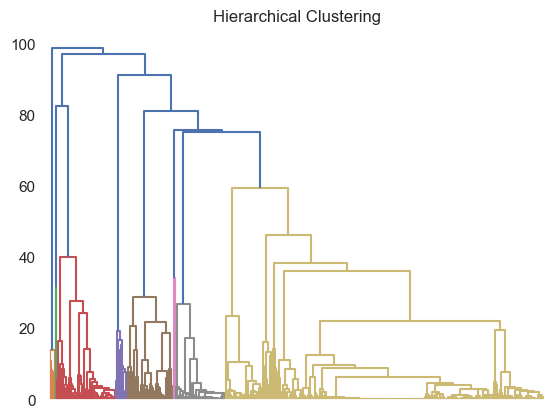

In [67]:
#Creating and Plotting a Dendrogram

den = sch.dendrogram(Z)         #Dendrogram plot based on the hierarchical clustering linkage matrix Z.
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.title('Hierarchical Clustering')

In [68]:
# Importing packages
from sklearn.cluster import AgglomerativeClustering 

In [69]:
# Creating a Agglomerative Clustering
hc_model = AgglomerativeClustering(n_clusters = 20, affinity = 'euclidean', linkage ='ward')

In [70]:
# Fitting the model
y_cluster = hc_model.fit_predict(power_scaler)

In [71]:
#create a copy of the DataFrame power_scaler and assigns it to a new DataFrame named data_clustered
data_clustered = power_scaler.copy()

In [72]:
#adds a new column named "Cluster" to the DataFrame data_clustered and assigns the values from the y_cluster array to that column and specifies the data type of the new column as 'object'.
data_clustered["Cluster"] = y_cluster.astype('object')

In [73]:
#Top 5 rows 
data_clustered.head()

office_strip_10 fridge_11   lamp_10 fridge_10     tv_10 food_processor_10  \
0       -0.394052 -0.146200 -0.124403 -0.245297 -0.340394         -0.121187   
1       -0.394052  1.717588 -0.124403  0.448702 -0.470805         -0.121187   
2       -0.394052 -0.120672 -0.124403  0.384339 -0.340394         -0.121187   
3       -0.394052 -0.123855 -0.124403  0.482282  2.585897         -0.121187   
4       -0.394052 -0.154332 -0.124403  0.501871 -0.340394         -0.121187   

      tv_11 charger_10 Cluster  
0 -0.269396  -0.086297       0  
1 -0.056174  -0.086297      11  
2 -0.264032  -0.086297       0  
3  0.406184  -0.086297       7  
4 -0.264032  -0.086297       0

In [218]:
silhouette_avg = silhouette_score(power_scaler, y_cluster)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5804634263984753


In [219]:
calinski_harabasz_index = calinski_harabasz_score(power_scaler, y_cluster)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Calinski-Harabasz Index: 1497.2728026467787


In [220]:
davies_bouldin_index = davies_bouldin_score(power_scaler, y_cluster)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Davies-Bouldin Index: 0.7360013224209543


In [74]:
#creating a list named cols that contains the column names of the DataFrame power_scaler
cols = list(data1.columns)
cols

['office_strip_10',
 'fridge_11',
 'lamp_10',
 'fridge_10',
 'tv_10',
 'food_processor_10',
 'tv_11',
 'charger_10']

# Principal Component Analysis (PCA)

In [127]:
#Importing libraries required for PCA
from numpy.linalg import eig
from sklearn.decomposition import PCA

In [182]:
# generate the covariance matrix using 'cov' function
cov_mat = np.cov(power_scaler.T)

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
print(cov_mat[0:5])

[[ 1.00020004 -0.03164376  0.01601898  0.02540867  0.07122027  0.01434811
   0.0206763   0.00926431]
 [-0.03164376  1.00020004  0.03353923  0.07144107  0.09576223 -0.00700164
   0.01488691  0.00983009]
 [ 0.01601898  0.03353923  1.00020004 -0.00204459  0.00836089  0.00639235
   0.03319537 -0.01073782]
 [ 0.02540867  0.07144107 -0.00204459  1.00020004  0.11760908  0.02580231
  -0.03344228  0.02167264]
 [ 0.07122027  0.09576223  0.00836089  0.11760908  1.00020004  0.03195527
  -0.01017649  0.08954436]]


In [184]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [1.23368947 0.8317543  0.89584597 0.93784576 0.98400027 1.05837944
 1.04000088 1.02008424] 

Eigenvectors: 
 
 [[-0.22113094  0.34549496  0.2206898  -0.2001165  -0.49736148 -0.32287089
   0.5681632  -0.26184015]
 [-0.40709718  0.39777736  0.45826244 -0.29373745  0.0343171   0.11076327
  -0.60430276 -0.03362902]
 [-0.08286218 -0.02267784 -0.13481845  0.56933724 -0.15631573 -0.38211797
  -0.38495212 -0.57590084]
 [-0.50996338  0.18878072 -0.75665153 -0.1281102  -0.06987579  0.32021694
   0.01589065 -0.08770066]
 [-0.63297745 -0.72202757  0.23903298  0.05544834 -0.06043771  0.00444641
   0.099197    0.06551281]
 [-0.14246248  0.10244413  0.12167196  0.00206424  0.79174686  0.02979352
   0.33101968 -0.46591474]
 [-0.01030341 -0.16431572 -0.28014792 -0.54061876  0.21044989 -0.72174296
  -0.17557138  0.07820045]
 [-0.31206096  0.35698137 -0.01305023  0.48761374  0.2175585  -0.33632206
   0.11545003  0.60288627]] 



In [185]:
# create a list of eigenvalues
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order
eig_val.sort(reverse = True)
print(eig_val)

[1.2336894654090007, 1.0583794379079552, 1.0400008765485265, 1.0200842406626807, 0.9840002695653, 0.9378457584045636, 0.8958459743953645, 0.8317542971706258]


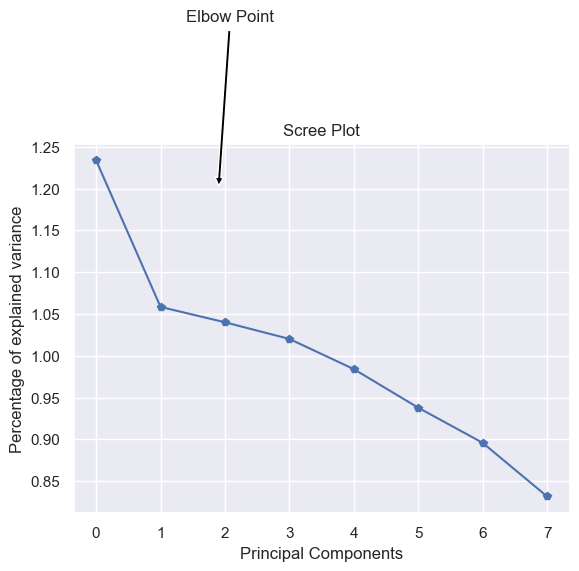

In [186]:
# 'bp' represents blue color and pentagonal shape of points
plt.plot(eig_val,'bp')            

# plot a line plot
plt.plot(eig_val) 

# label the x-axis
plt.xlabel('Principal Components')    

# label the y-axis
plt.ylabel('Percentage of explained variance')      

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text ='Elbow Point', xy=(2.0,1.04), xytext=(1.4, 1.4), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))

# title of the plot
plt.title('Scree Plot')

plt.show()   

In [187]:
eigenvector = eig_vec[:,0:3]

eigenvector

array([[-0.22113094,  0.34549496,  0.2206898 ],
       [-0.40709718,  0.39777736,  0.45826244],
       [-0.08286218, -0.02267784, -0.13481845],
       [-0.50996338,  0.18878072, -0.75665153],
       [-0.63297745, -0.72202757,  0.23903298],
       [-0.14246248,  0.10244413,  0.12167196],
       [-0.01030341, -0.16431572, -0.28014792],
       [-0.31206096,  0.35698137, -0.01305023]])

In [189]:
# take the dot product of 'power_scaler' with 'eigenvector' to obtain new dataset
# create a dataframe of principal components
df_pca = pd.DataFrame(power_scaler.dot(eigenvector), columns= ['PC1','PC2','PC3'])

In [190]:
# checking shape of new data
df_pca.shape

(5000, 3)

In [191]:
# specify required no of components
# take 'n_components=3' based on the analysis of scree plot
pca = PCA(n_components=3, random_state=0)  

# fit_transform() computes the principal components 
# pass the standardized data to fit PCA
PrincipalComponents = pca.fit_transform(power_scaler)

In [192]:
# create a dataframe of principal components
PCA_df = pd.DataFrame(data = PrincipalComponents, columns = ['PC1', 'PC2','PC3'])

# head() to display top five rows
PCA_df.head()

PC1       PC2       PC3
0 -0.544487 -0.298357  0.128092
1  0.487819 -0.572555  1.293728
2 -0.212949 -0.498933  0.134455
3  1.694885 -0.059232 -0.041634
4 -0.166714 -0.532841  0.112246

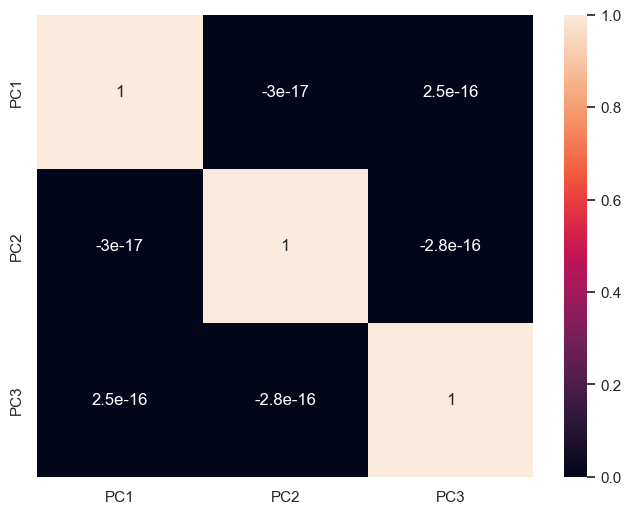

In [193]:
# Plotting Heatmap to check is there still dependency in the dataset.

plt.figure(figsize = (8,6))        
ax = sns.heatmap(PCA_df.corr(),annot = True)

<Axes: xlabel='PC3', ylabel='PC2'>

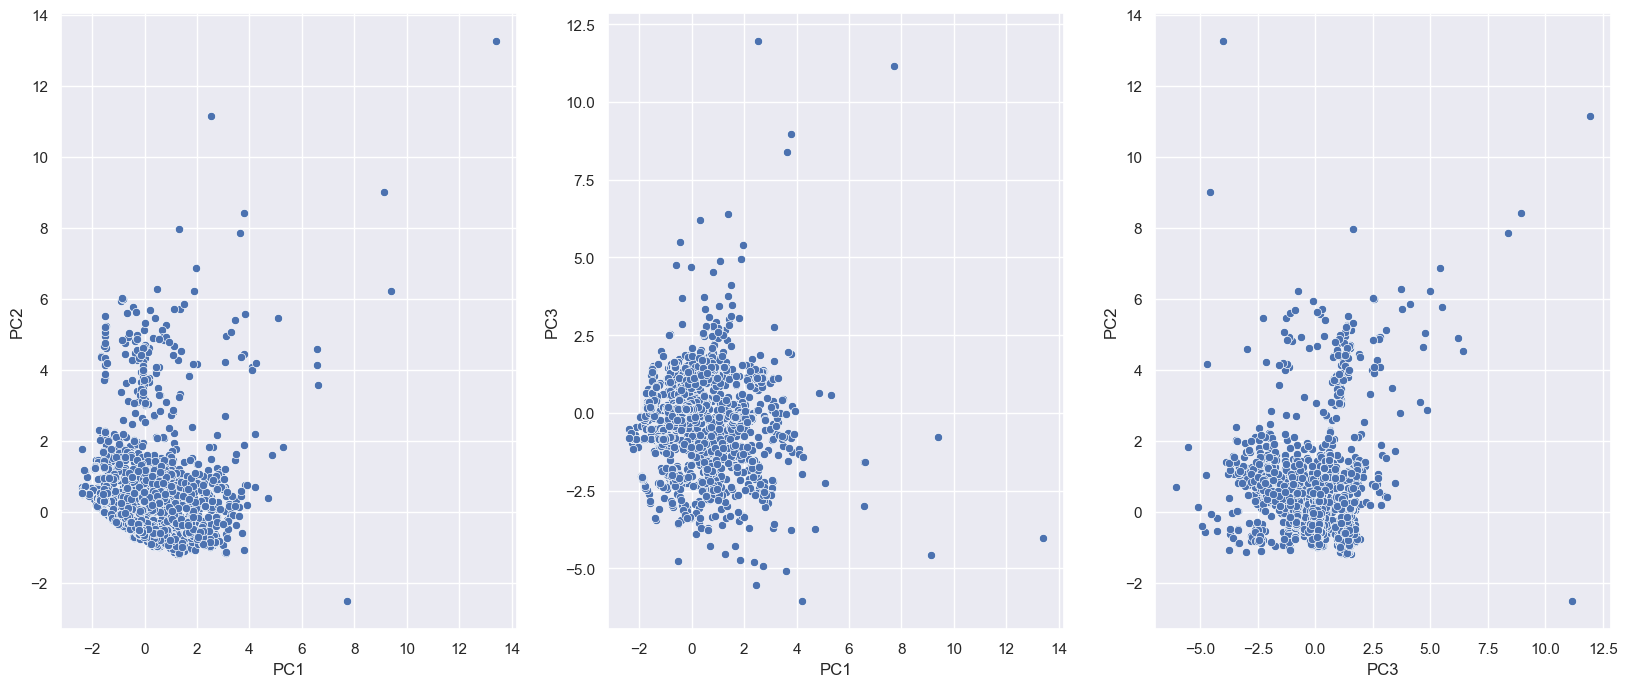

In [194]:
# Scatter Plot to visualize the spread of data across PCA components
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(data=PCA_df, x='PC1', y='PC2')
plt.subplot(1,3,2)
sns.scatterplot(data=PCA_df, x='PC1', y='PC3')
plt.subplot(1,3,3)
sns.scatterplot(data=PCA_df, x='PC3', y='PC2')

#Outlier Analysis and Treatmen

Text(0.5, 0, 'PC Components')

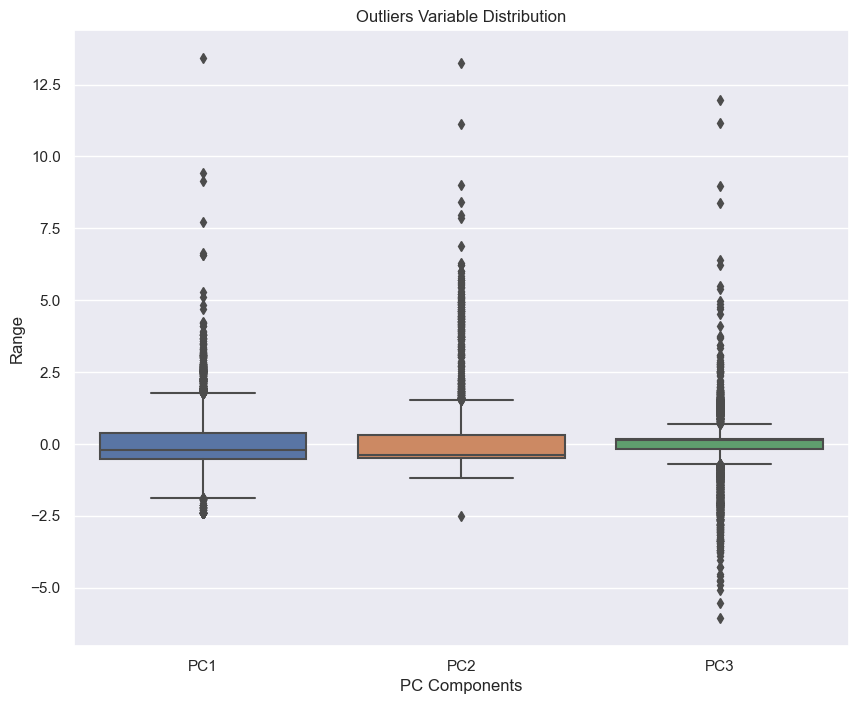

In [195]:
# Outlier Analysis 

outliers = ['PC1','PC2','PC3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = PCA_df[outliers])
plt.title("Outliers Variable Distribution")
plt.ylabel("Range")
plt.xlabel("PC Components")

In [196]:
# Statstical Outlier treatment for PC_1

Q1 = PCA_df.PC1.quantile(0.05)
Q3 = PCA_df.PC1.quantile(0.95)
IQR = Q3 - Q1
PCA_df = PCA_df[(PCA_df.PC1 >= Q1) & (PCA_df.PC1 <= Q3)]

In [197]:
# Statstical Outlier treatment for PC_2

Q1 = PCA_df.PC2.quantile(0.05)
Q3 = PCA_df.PC2.quantile(0.95)
IQR = Q3 - Q1
PCA_df = PCA_df[(PCA_df.PC2 >= Q1) & (PCA_df.PC2 <= Q3)]

In [198]:
# Statstical Outlier treatment for PC_3

Q1 = PCA_df.PC3.quantile(0.05)
Q3 = PCA_df.PC3.quantile(0.95)
IQR = Q3 - Q1
PCA_df = PCA_df[(PCA_df.PC3 >= Q1) & (PCA_df.PC3 <= Q3)]

Text(0.5, 0, 'PC Components')

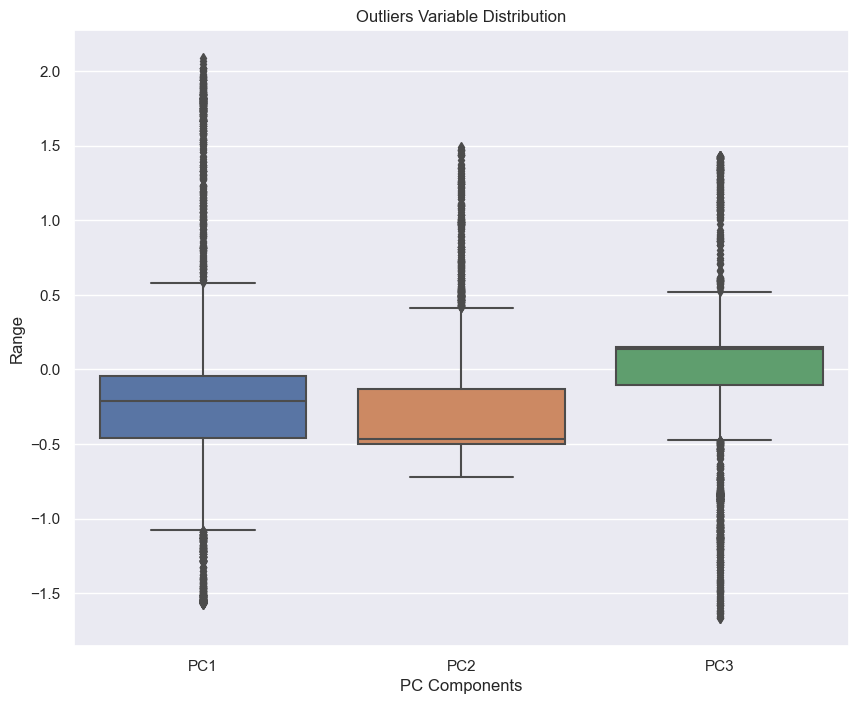

In [199]:
# Plot after Outlier removal 

outliers = ['PC1','PC2','PC3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = PCA_df[outliers])
plt.title("Outliers Variable Distribution")
plt.ylabel("Range")
plt.xlabel("PC Components")

# DBSCAN TECHNIQUE

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) can be utilized in an energy recommender system to group users or devices based on their energy consumption patterns

In [82]:
# DBSCAN
cluster = DBSCAN(eps=3, min_samples=10).fit(data1)#epsilon parameter that defines the maximum distance between two samples for 
                                                    #one to be considered as in the neighborhood of the other.

cluster.labels_

array([ 0, -1, -1, ..., -1, -1, -1], dtype=int64)

In [83]:
CL = cluster.labels_
df_labels = pd.DataFrame(CL, columns=["Cluster"])
cluster_counts = df_labels.groupby('Cluster').size().to_frame()

In [84]:
cluster_counts.columns = ["DBSCAN"]
cluster_counts

DBSCAN
Cluster        
-1         2453
 0           69
 1         1565
 2           26
 3           87
 4           31
 5          206
 6           70
 7           74
 8           14
 9           43
 10          18
 11          30
 12          38
 13          34
 14          13
 15          15
 16          27
 17          23
 18          23
 19          53
 20          17
 21          18
 22          13
 23          11
 24          19
 25          10

C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


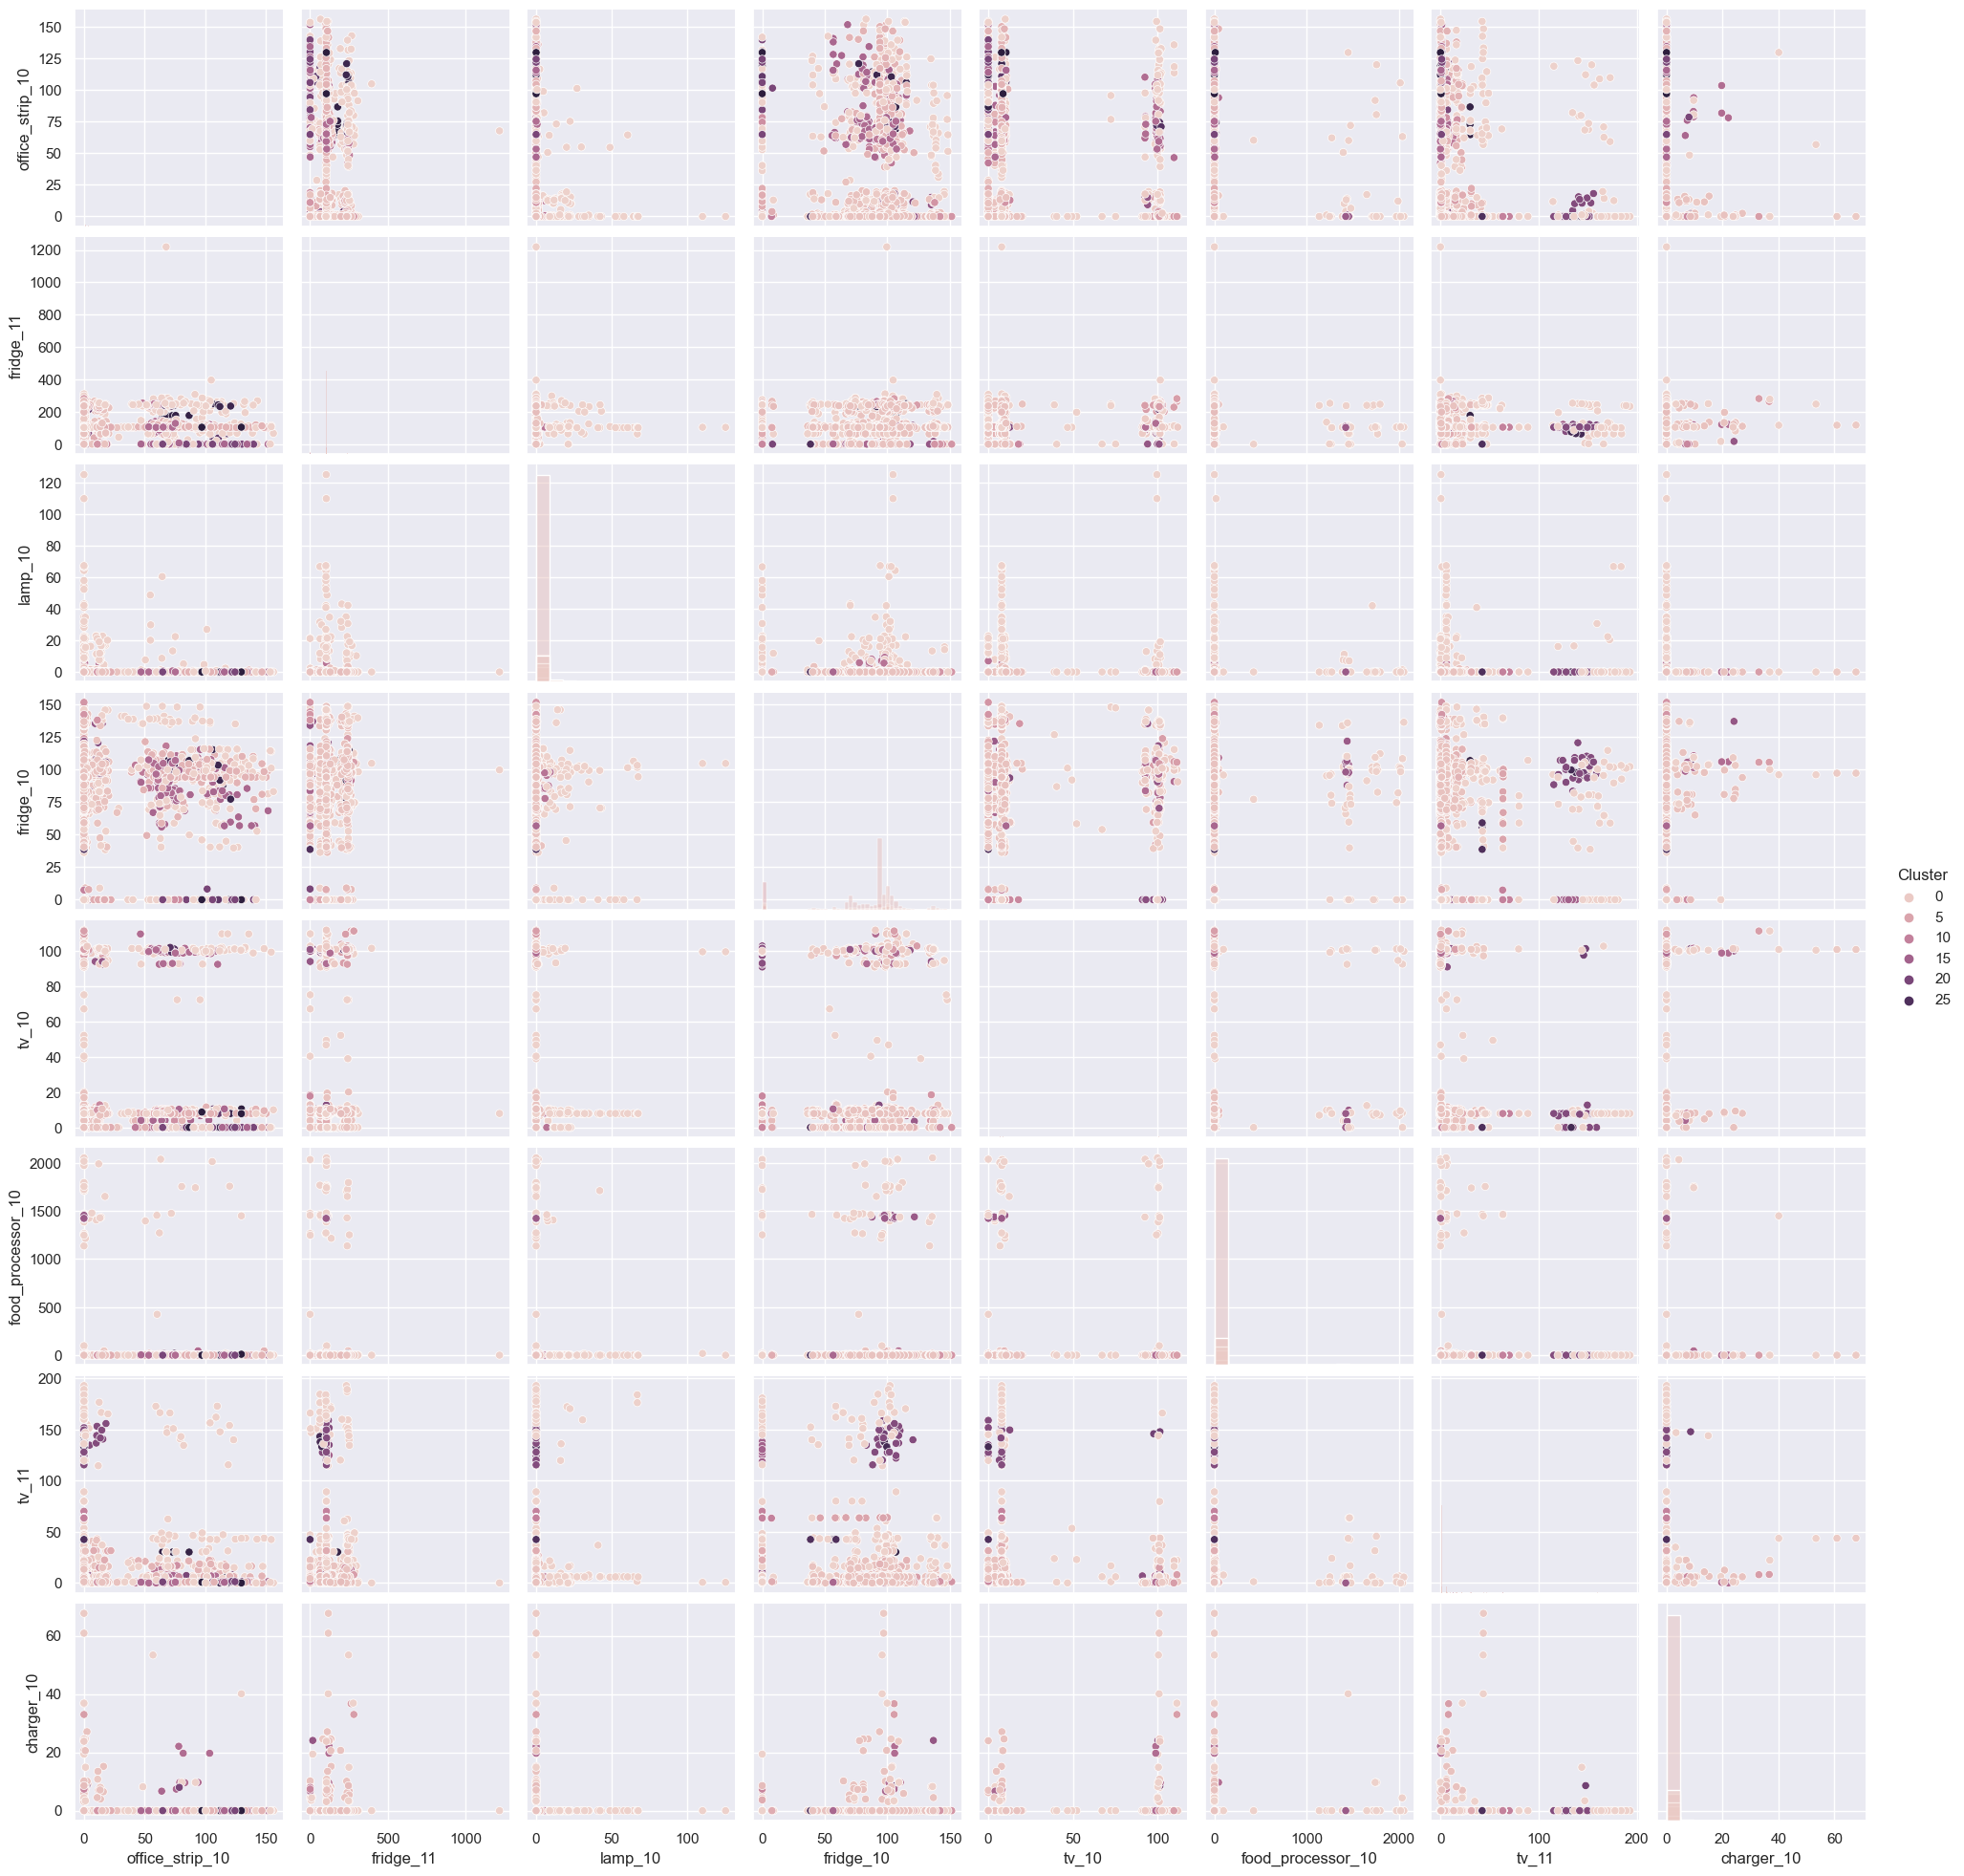

In [85]:
# Add the cluster labels to the original dataset
data1['Cluster'] = clusters

# Visualize the clusters (pairplot with hue='Cluster')
sns.pairplot(data1, hue='Cluster', diag_kind='hist')
plt.show()

In [77]:
# Apply DBSCAN
dbscan = DBSCAN(eps=3, min_samples=10)

In [80]:
# Extract relevant features for clustering
feature= data1.iloc[:, :2].values

# Fix the error by using the correct indexing for features
labels = dbscan.fit_predict(feature)

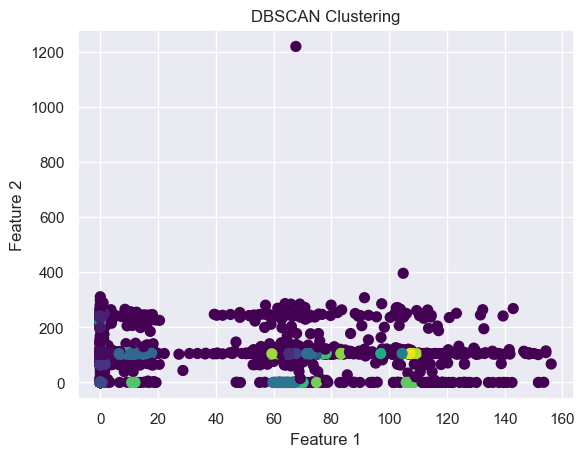

In [81]:
# Visualize the results
plt.scatter(feature[:, 0], feature[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')#all row 1st column
plt.ylabel('Feature 2')#all row 2nd column
plt.show()

# T-SNE Method


t-SNE (t-Distributed Stochastic Neighbor Embedding) can be used in an energy recommender system to visualize and understand the high-dimensional patterns in energy consumption data

In [42]:
from sklearn.manifold import TSNE
# Instantiate t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(data1)

C:\Users\DD\AppData\Local\Temp\ipykernel_4564\3599433928.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='jet', edgecolor='k', s=50)


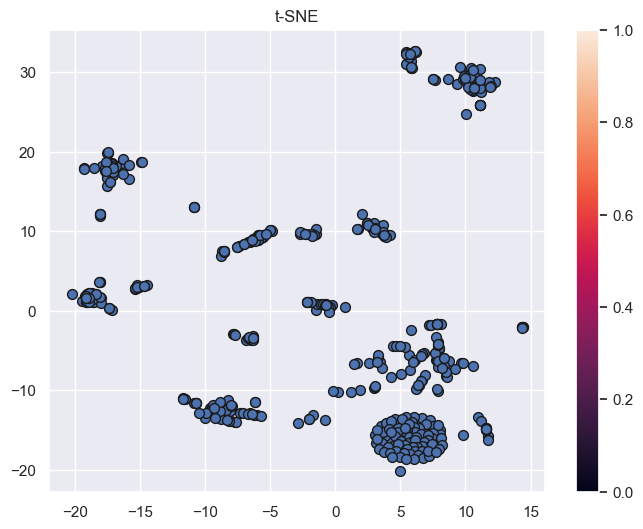

In [46]:
# Create a scatter plot of the two-dimensional data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='jet', edgecolor='k', s=50)
plt.colorbar()
plt.title('t-SNE')
plt.show()

# Fuzzy clustering

Fuzzy clustering in an energy recommender system can be employed to group users or devices based on their energy consumption patterns with varying degrees of membership

In [10]:
# Import the missing library
import skfuzzy as fuzz

# Create synthetic data with three clusters
data.seed(42)
data1= data.concatenate((data.random.normal(-2, 1, 100),
                       data.random.normal(0, 1, 100),
                       data.random.normal(2, 1, 100)))

In [11]:
# Reshape data to have a single feature
data1 = data1.reshape(-1, 1) 

# Apply Fuzzy C-Means
centers, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data1.T, 3, 2, error=0.005, maxiter=1000)


In [13]:
# Extract the cluster memberships
cluster_membership = data1.argmax(u, axis=0)

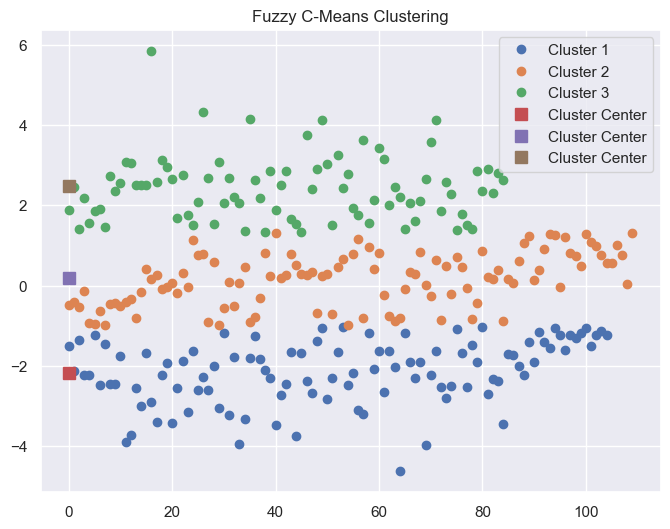

In [14]:
# Visualize the results
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(3):
    ax.plot(data1[cluster_membership == i], 'o', label=f'Cluster {i + 1}')

for center in centers:
    ax.plot(center, 's', markersize=8, label='Cluster Center')

ax.set_title('Fuzzy C-Means Clustering')
ax.legend()
plt.show()

# Conclusion

After applying the K-means algorithm and  with an optimized number of clusters, we segment the household appliances under 'office_strip_10', 'fridge_11', 'lamp_10','tv_10','food_processor_10','tv_11','charger_10', and 'fridge_10' categories.

Hierarchical clustering is preferred for power eye data clustering based on the evaluated metrics.
Its ability to create well-defined clusters and the higher silhouette score make it a suitable choice for extracting meaningful patterns from household appliances.